In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
route = './data/HISTORICO_SUERTES.xlsx'
df = pd.read_excel(route)

In [3]:
df_clean = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [4]:
df.head(3)

Período  Hacienda           Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493        LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284  UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203    EL AMPARO SAA  IP05      31.0    007  CORINTIAS    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN                   NaN                       NaN   
1                     NaN                   NaN                       NaN   
2                     NaN                   NaN                       NaN   

  Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
0                NaN                    NaN               NaN   
1                NaN                    NaN               NaN   
2                NaN                    NaN               NaN   

   Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
0                  NaN              NaN               NaN  
1                  NaN              NaN               NaN  
2                  NaN              NaN               NaN  

[3 rows x 85 columns]

## **EDA y Regresión para %Sac.Caña**

#### **Análisis de variables numéricas y categoricas**

In [5]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km',
       'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ',
       'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S',
       'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ci

In [6]:
CATEGORICAL_FEATURES = df.select_dtypes(include=["object", "category"]).columns
print(CATEGORICAL_FEATURES)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó',
       'Codigo Estacion'],
      dtype='object')


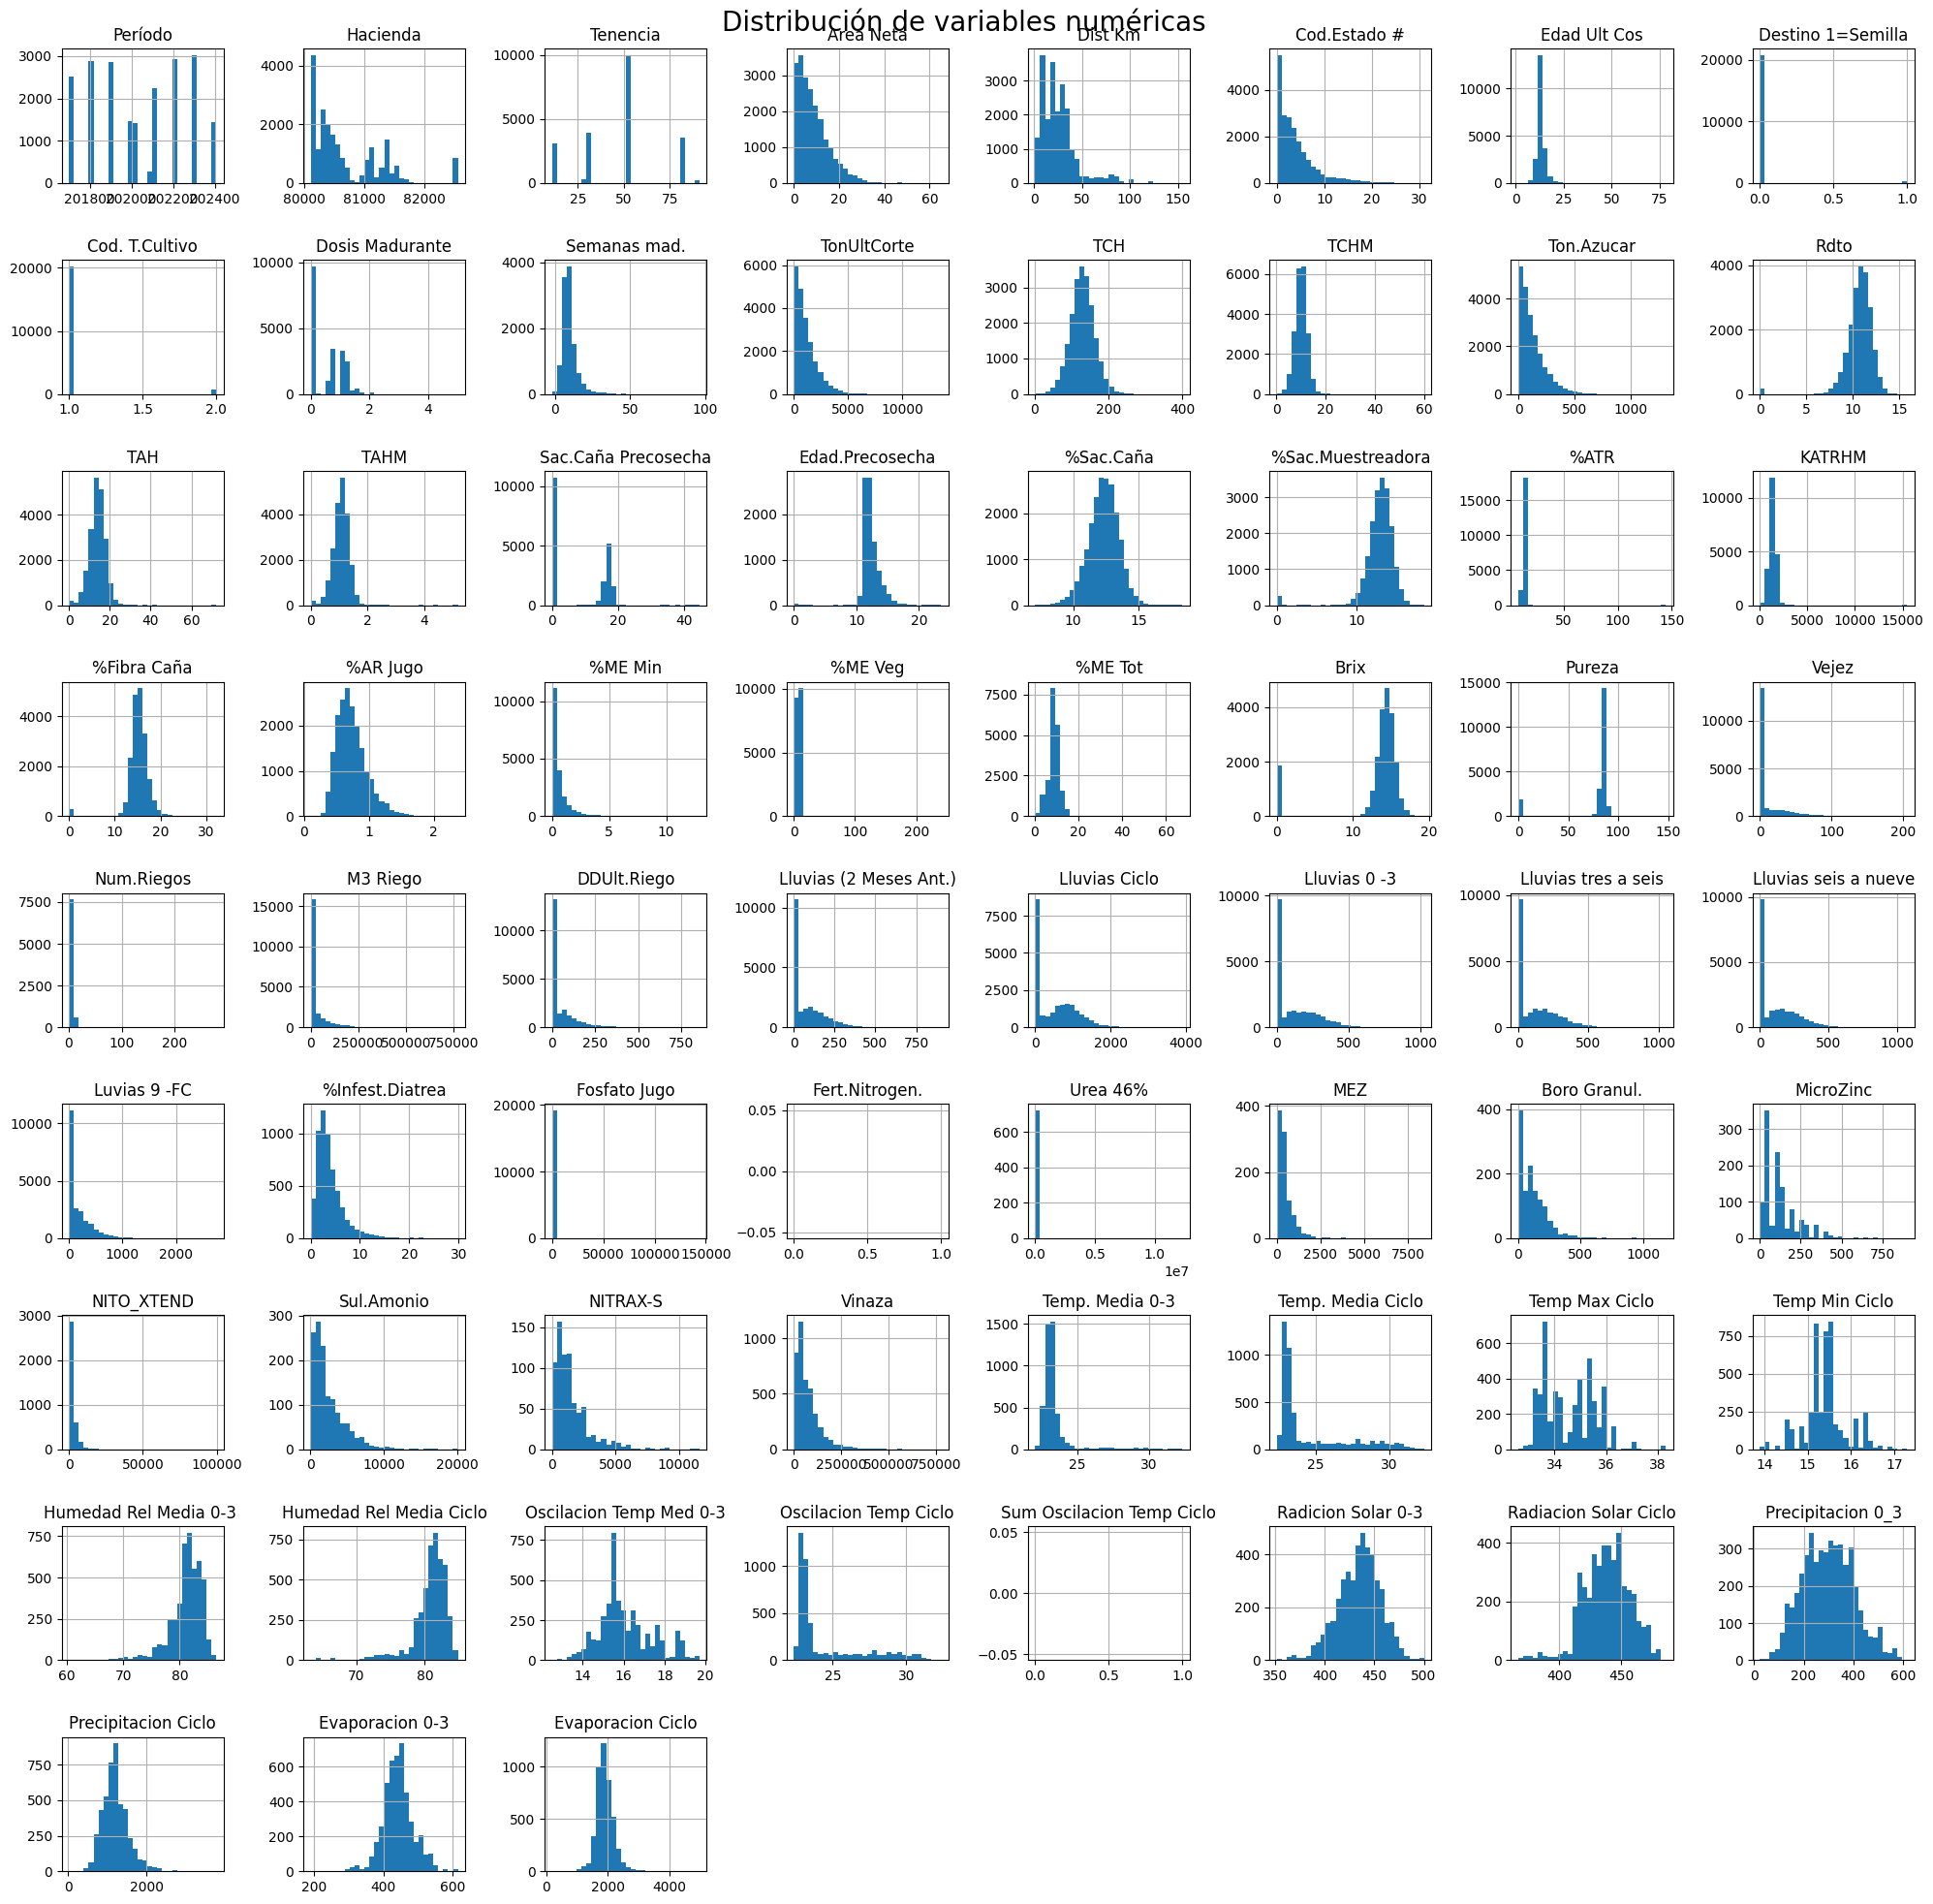

In [7]:
df[NUMERICAL_FEATURES].hist(
    bins=30,
    figsize=(20, 20),   
)
plt.suptitle("Distribución de variables numéricas", fontsize=20)
plt.tight_layout()
plt.show()

---
### **Limpieza: Identificadores** 

Limpieza de variables como `Periodo`, `Hacienda`, `Nombre`, `Suerte`, `Cod.Estado`, `F.Siembra` debido a posible data leakage o variables que no aportan prediccion porque pueden hacer las veces de identificadores más que de predictores. 

In [8]:
REDUNDANT_FEATURES = ['Período', 'Hacienda', 'Nombre', 'Suerte', 'Cod.Estado', 'F.Siembra', 'Cerca de', 'Tenencia', 'Zona', 'Cosechó']
df = df.drop(columns = REDUNDANT_FEATURES)

---
### **Matrices de Correlación**  
Matrices de correlación orientadas a TCH y %Sac.Caña, al igual que matriz de correlación general

In [9]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns

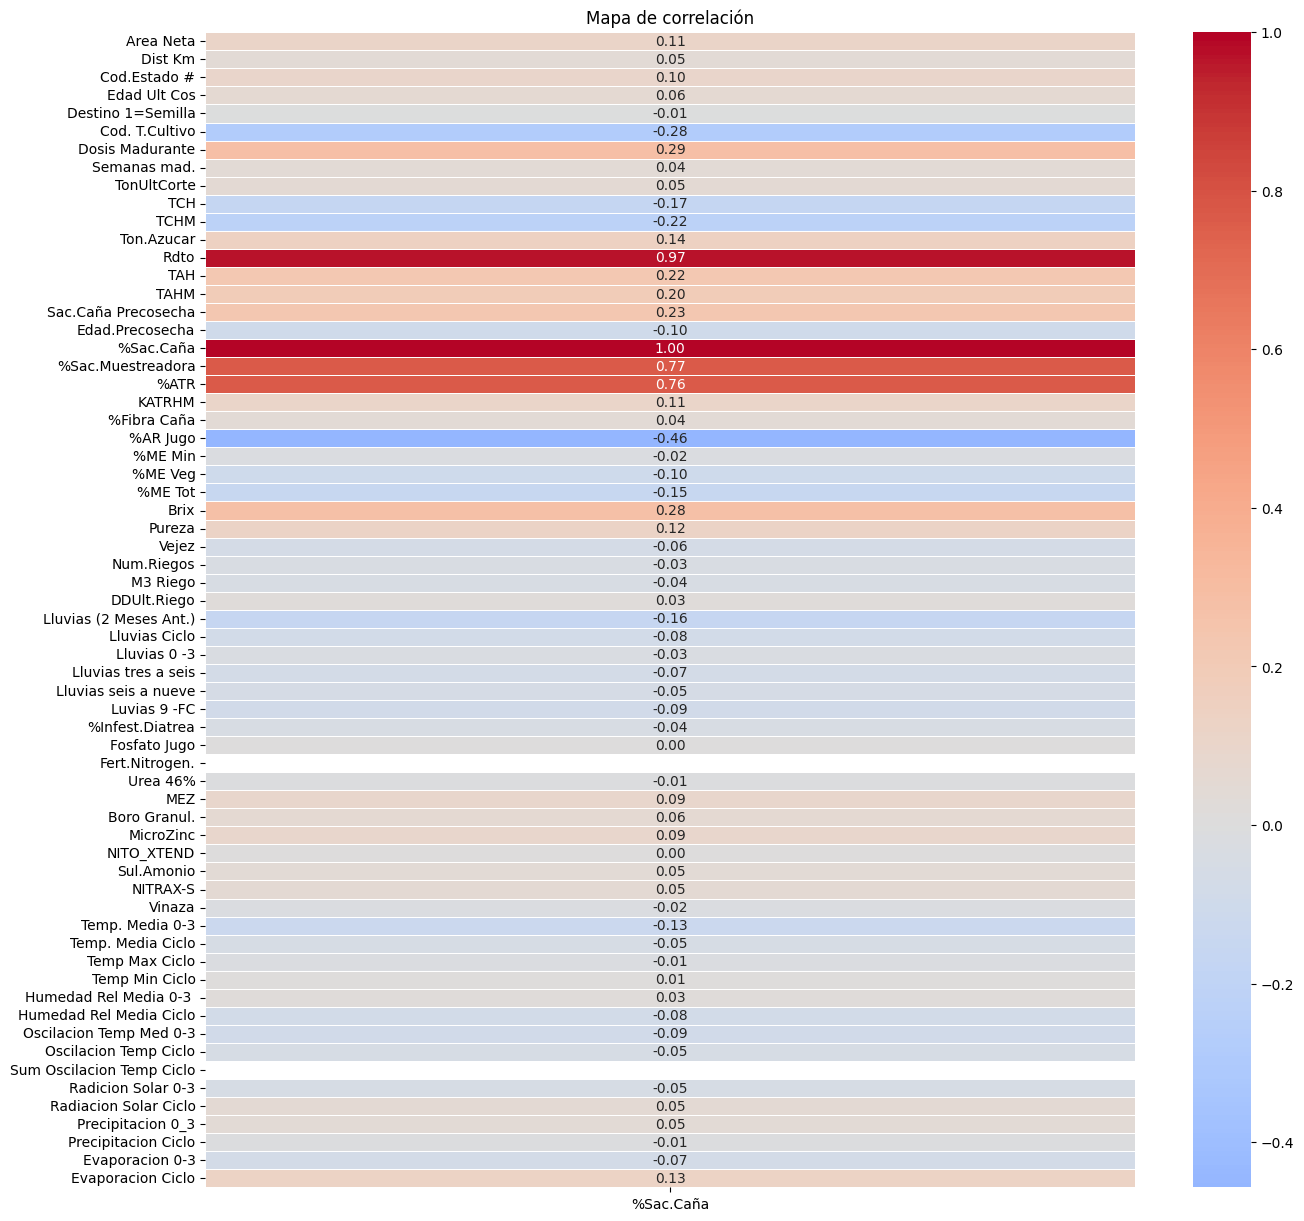

In [10]:
plt.figure(figsize=(15,15))
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
sns.heatmap(numerical_corr[["%Sac.Caña"]], 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

Se observa multicolinealidad entre algunas variables al igual que altas correlaciones entre variable objetivo y posibles leaks. 

---
### **Limpieza: Leakage para %Sac.Caña**
Se eliminan variables que se obtienen despues de la cosecha de la caña y que no influyen en la predicción de porcentaje de sacarosa.  

In [11]:
SAC_LEAKAGE = ['TonUltCorte', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha', 'TCH', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix', 'Pureza', 'TCHM']

df = df.drop(columns = SAC_LEAKAGE)

---
### **Limpieza: Variables de Riego**  
Se revisan features relacionadas con riego y se observan correlaciones menores a 0.9, por el momento se decide dejarlas todas. 

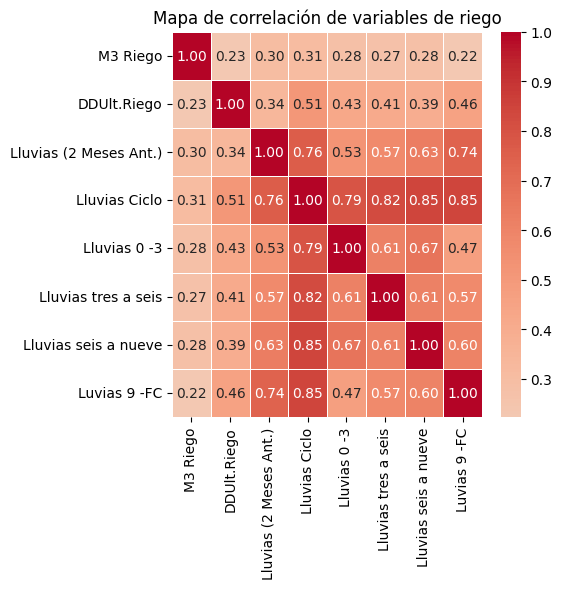

In [12]:
IRRIGATION_FEATURES = ['M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC']

plt.figure(figsize=(5,5))
numerical_irrig_df = df[IRRIGATION_FEATURES]
irrig_corr = numerical_irrig_df.corr()
sns.heatmap(irrig_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables de riego")
plt.show()

Si bien están correlacionadas, cada una capturan diferentes aspectos. Se conservan para estudiar relaciones no lineales. 

---
### **Limpieza: Variables del clima**  
Se revisan variables relacionadas del clima. 

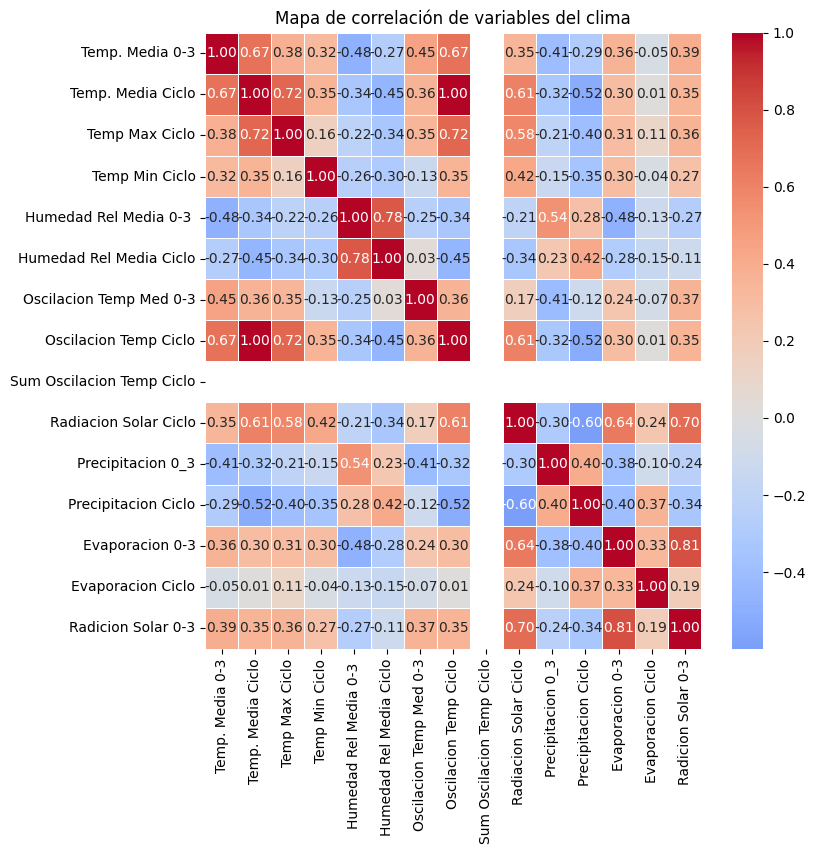

In [13]:
WEATHERING_FEATURES = ['Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo', 'Radicion Solar 0-3']

plt.figure(figsize=(8,8))
numerical_weathering_df = df[WEATHERING_FEATURES]
weathering_corr = numerical_weathering_df.corr()
sns.heatmap(weathering_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables del clima")
plt.show()

Se observa variable `Sum Oscilacion Temp Ciclo` vacía, se procede a eliminarla al igual que una de las variables `Oscilacion Temp Ciclo` debido a que tiene una correlación de 1 con `Temp Media Ciclo`. 

In [14]:
WEATHERING_DEPURE = ['Sum Oscilacion Temp Ciclo', 'Oscilacion Temp Ciclo']
WEATHERING_FEATURES = [f for f in WEATHERING_FEATURES if f not in WEATHERING_DEPURE]
df = df.drop(columns = WEATHERING_DEPURE)
df[WEATHERING_FEATURES]

Temp. Media 0-3  Temp. Media Ciclo  Temp Max Ciclo  Temp Min Ciclo  \
0                  NaN                NaN             NaN             NaN   
1                  NaN                NaN             NaN             NaN   
2                  NaN                NaN             NaN             NaN   
3                  NaN                NaN             NaN             NaN   
4                  NaN                NaN             NaN             NaN   
...                ...                ...             ...             ...   
21022           30.930             31.089            35.4            16.6   
21023           30.348             30.945            35.4            16.6   
21024           30.348             30.945            35.4            16.6   
21025           30.731             31.040            35.4            16.6   
21026           30.113             30.890            35.4            16.6   

       Humedad Rel Media 0-3   Humedad Rel Media Ciclo  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                         NaN                      NaN   
...                       ...                      ...   
21022                  73.637                   78.797   
21023                  73.308                   78.704   
21024                  73.308                   78.704   
21025                  73.418                   78.720   
21026                  73.176                   78.687   

       Oscilacion Temp Med 0-3  Radiacion Solar Ciclo  Precipitacion 0_3  \
0                          NaN                    NaN                NaN   
1                          NaN                    NaN                NaN   
2                          NaN                    NaN                NaN   
3                          NaN                    NaN                NaN   
4                          NaN                    NaN                NaN   
...                        ...                    ...                ...   
21022                     16.4                444.382              177.3   
21023                     17.8                444.528              168.7   
21024                     17.8                444.528              168.7   
21025                     17.8                444.839              177.3   
21026                     17.8                444.372              119.8   

       Precipitacion Ciclo  Evaporacion 0-3  Evaporacion Ciclo  \
0                      NaN              NaN                NaN   
1                      NaN              NaN                NaN   
2                      NaN              NaN                NaN   
3                      NaN              NaN                NaN   
4                      NaN              NaN                NaN   
...                    ...              ...                ...   
21022               1037.8            542.2             1824.6   
21023               1041.6            536.4             1867.2   
21024               1041.6            536.4             1867.2   
21025               1037.8            544.2             1843.9   
21026               1041.6            532.5             1881.2   

       Radicion Solar 0-3  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
...                   ...  
21022             467.043  
21023             461.663  
21024             461.663  
21025             467.911  
21026             459.274  

[21027 rows x 13 columns]

In [15]:
## Se elimina Fert. Nitrogen porque también está vacía
df = df.drop(columns = ['Fert.Nitrogen.'])

---
### **Distribucion Final**

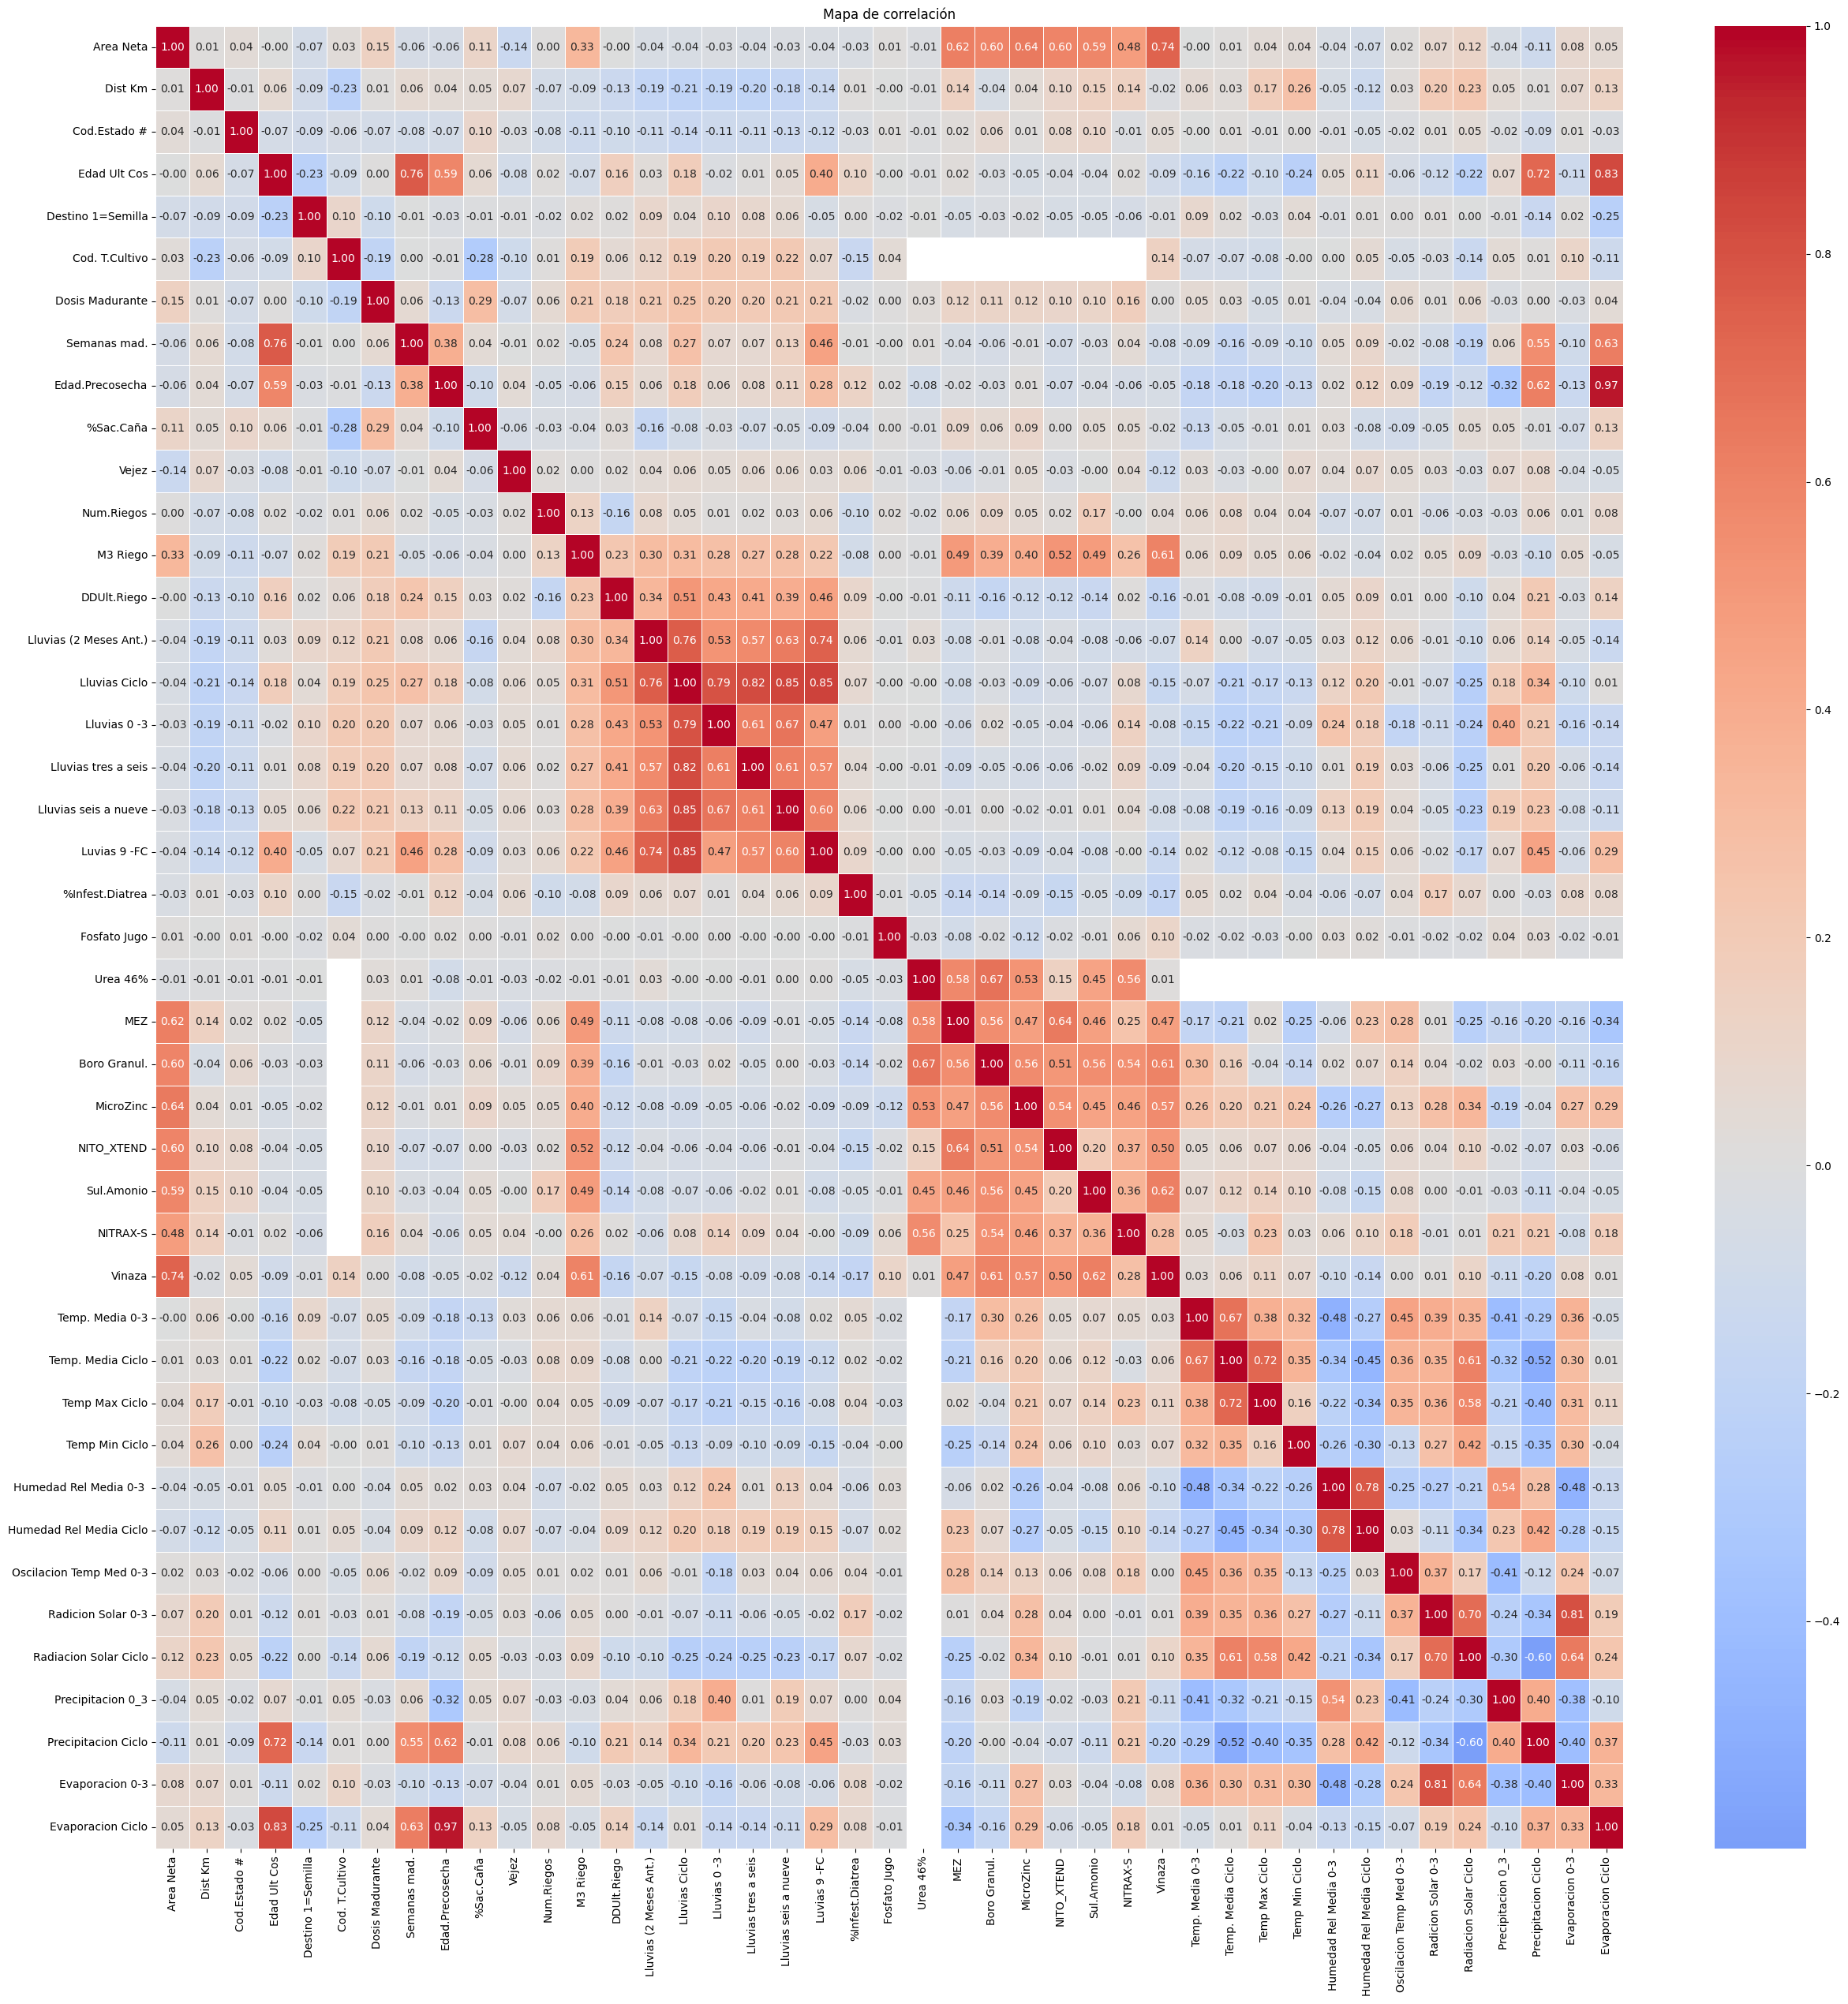

In [16]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(numerical_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

---
### **Distribución de %Sac.Caña**

In [17]:
df['%Sac.Caña'].describe()

count    20578.000000
mean        12.320202
std          1.145738
min          7.086000
25%         11.619000
50%         12.370650
75%         13.087500
max         18.400000
Name: %Sac.Caña, dtype: float64

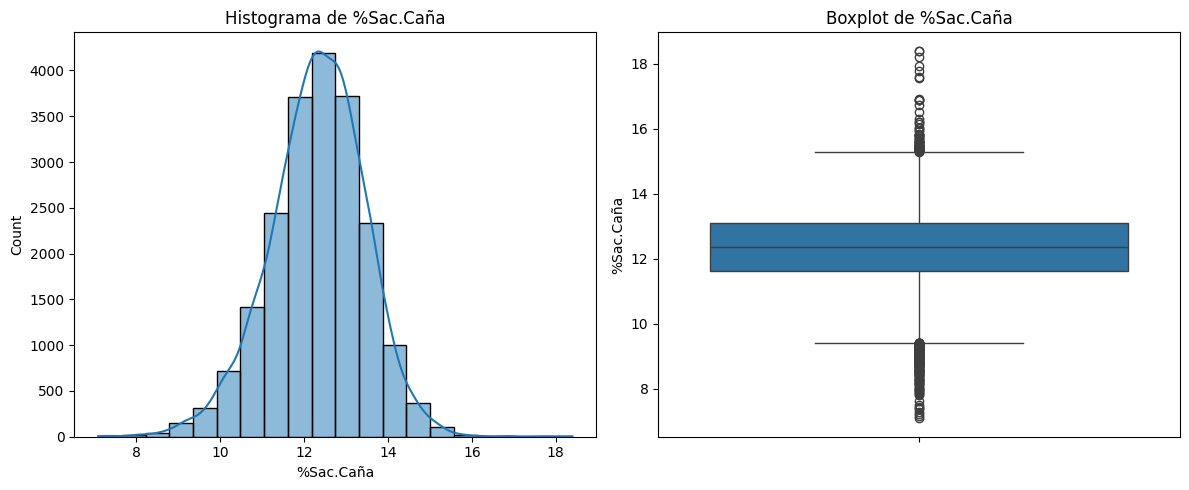

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['%Sac.Caña'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histograma de %Sac.Caña")

sns.boxplot(y=df['%Sac.Caña'], ax=axes[1])
axes[1].set_title("Boxplot de %Sac.Caña")

plt.tight_layout()
plt.show()

Se decide no eliminar valores atipicos debido a que no parecen que sea por problemas de digitación, sino por condiciones naturales como el tipo de cultivo. 

### **Gráficos de Dispersión respecto a %Sac.Caña**  
Para revisar si se puede inferir alguna relación lineal, o cuadrática entre las variables predictoras y objetivo. 

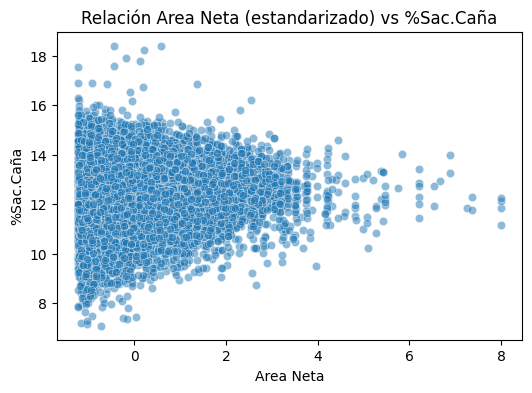

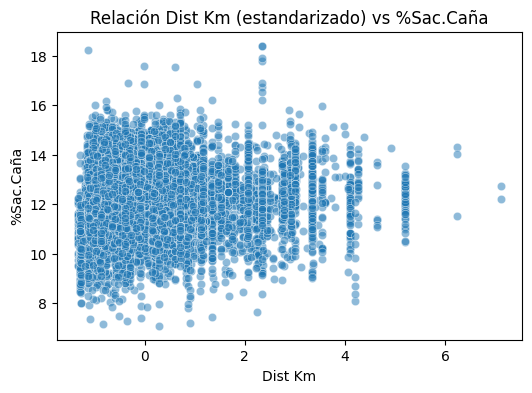

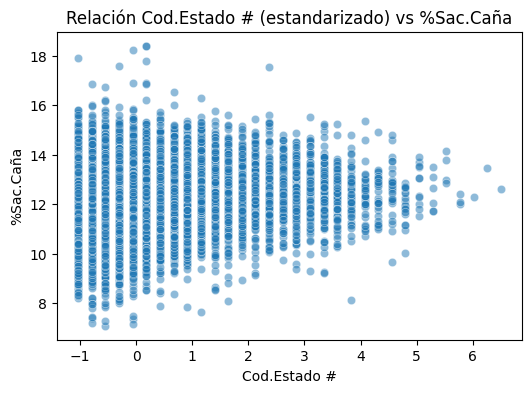

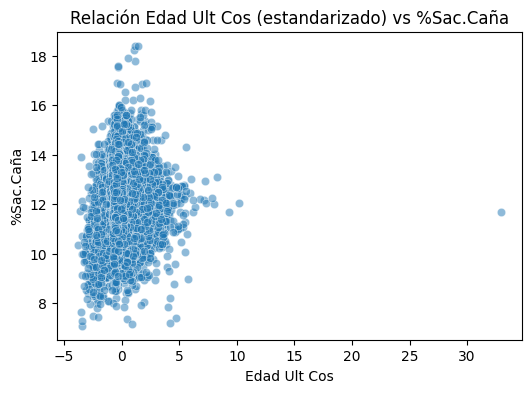

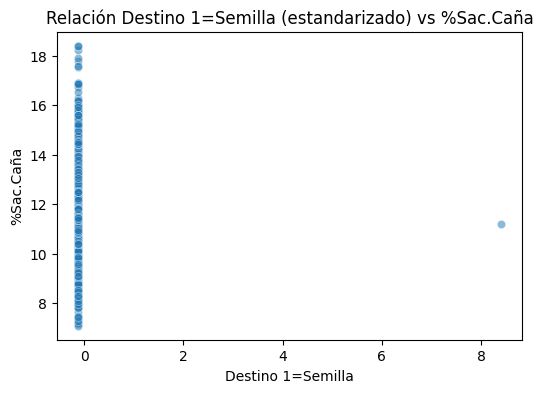

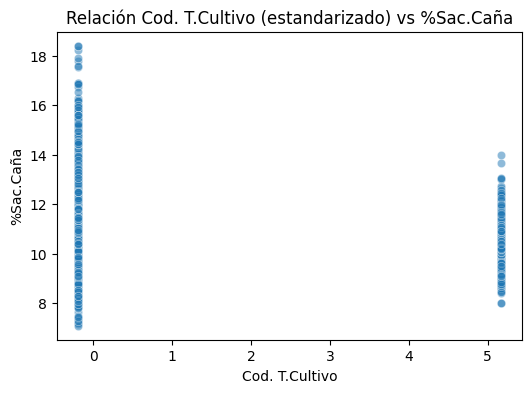

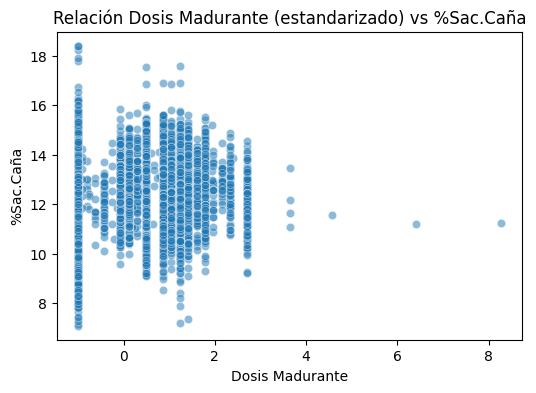

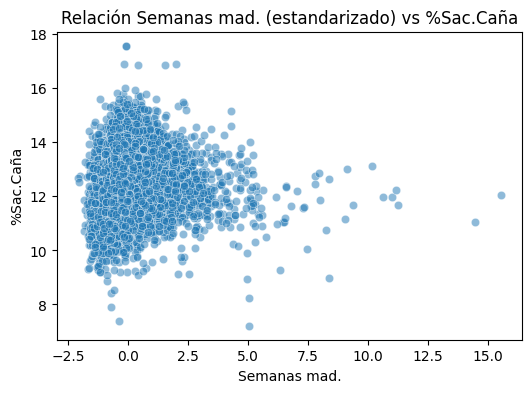

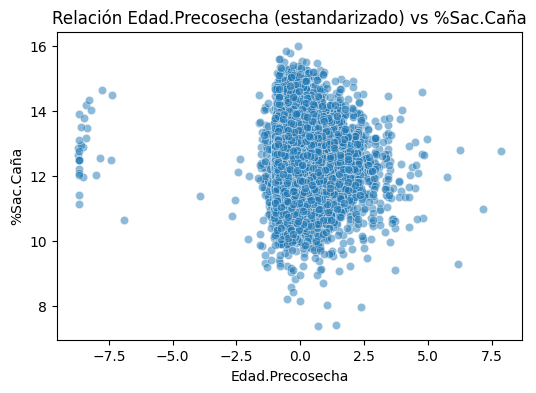

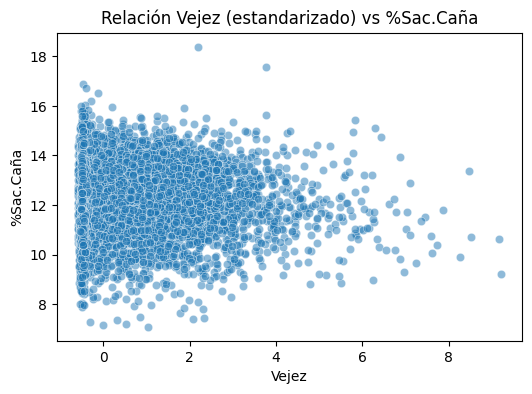

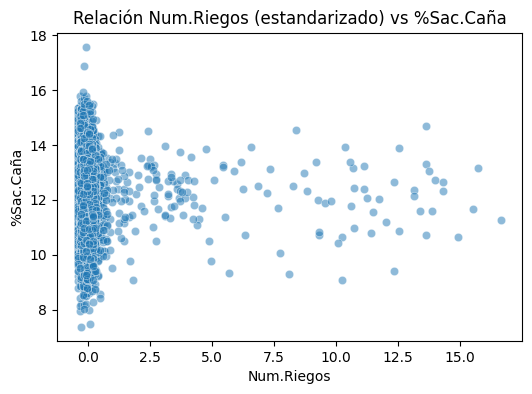

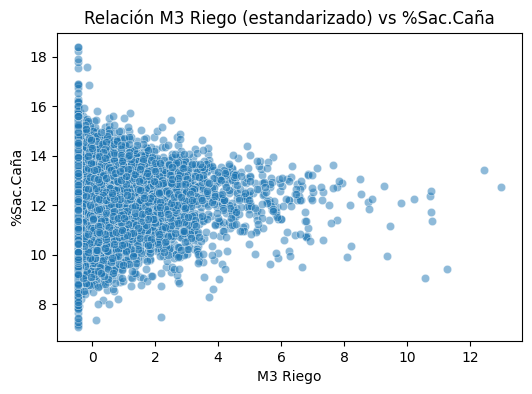

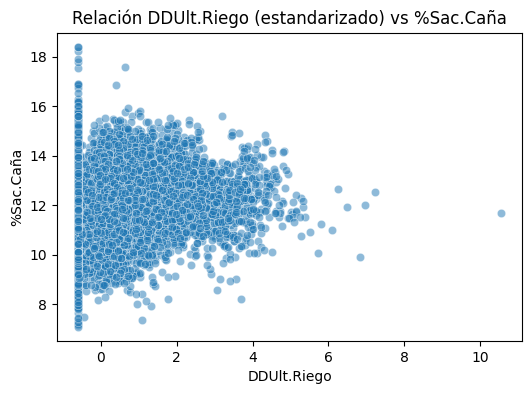

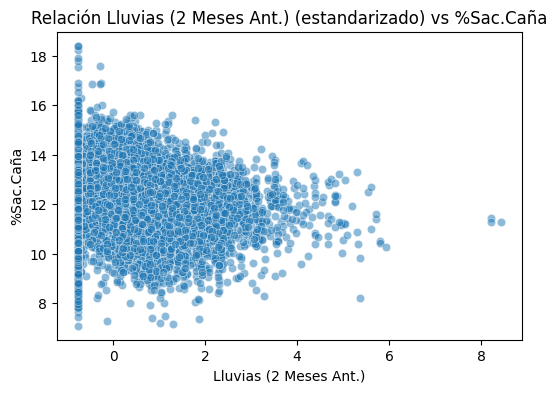

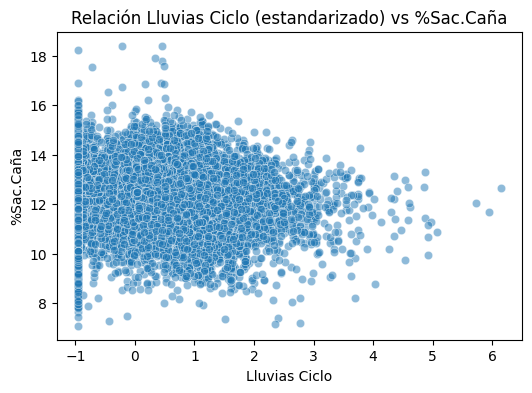

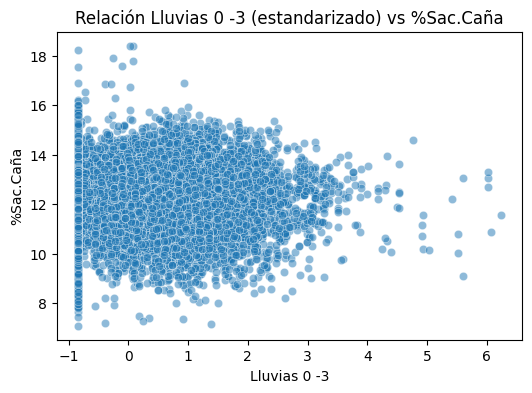

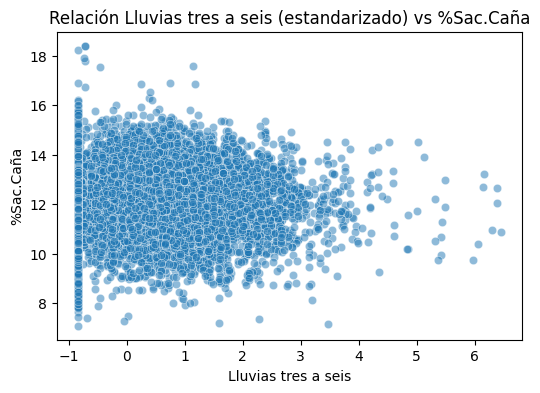

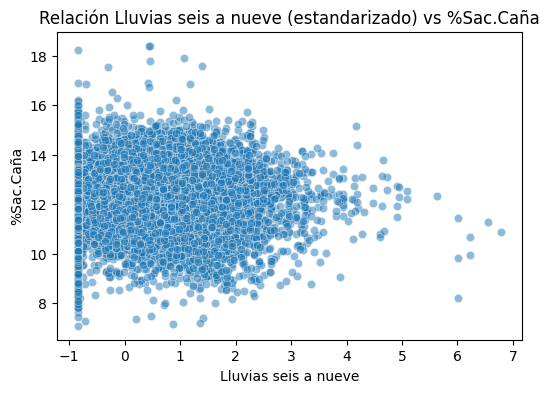

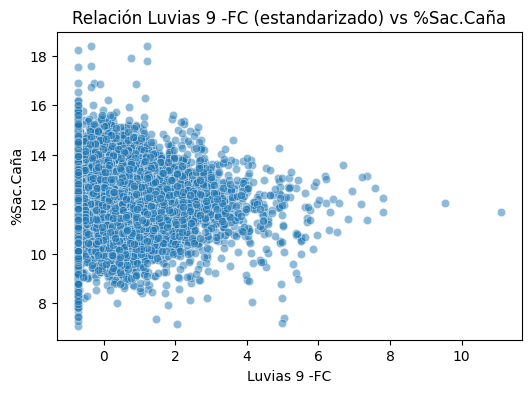

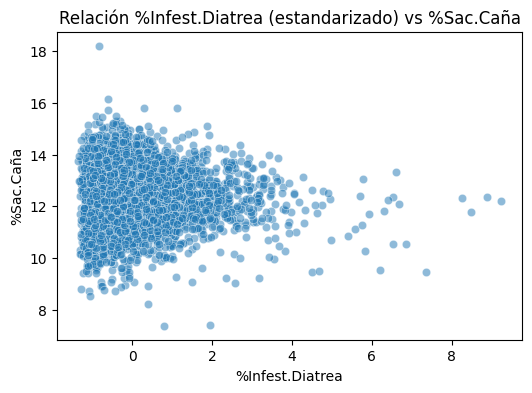

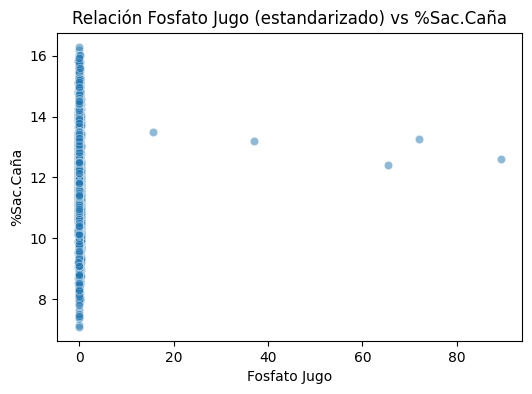

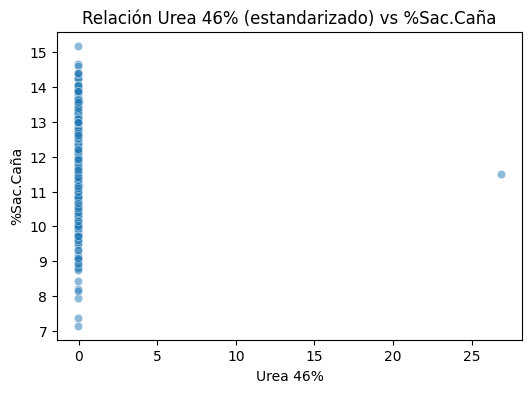

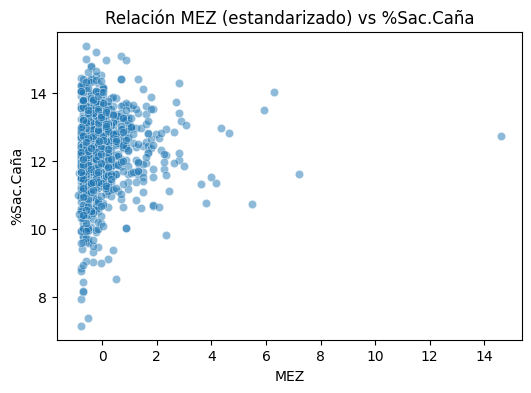

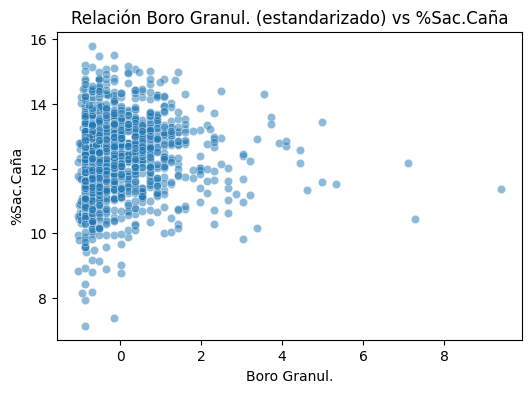

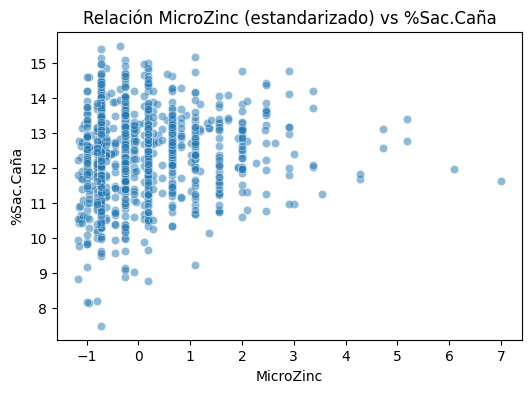

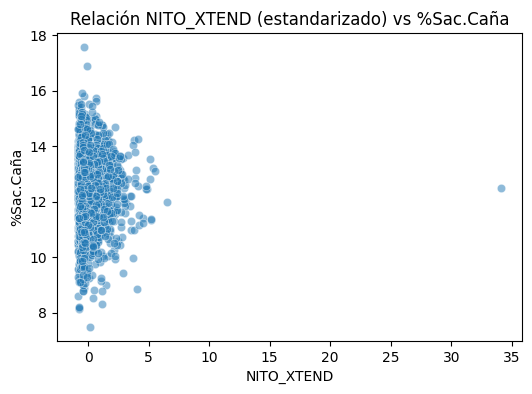

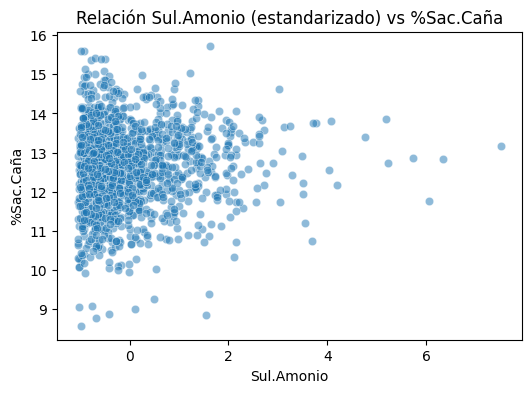

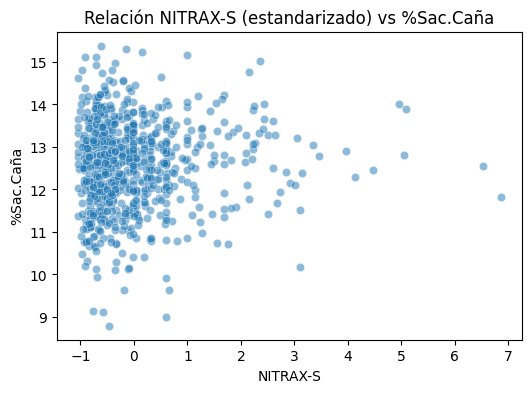

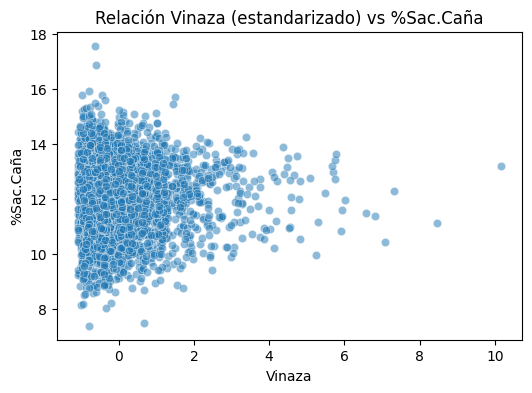

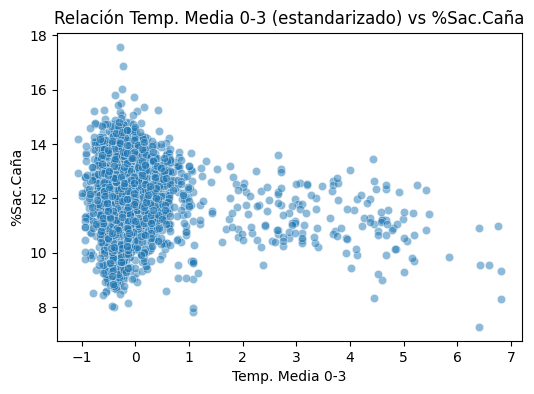

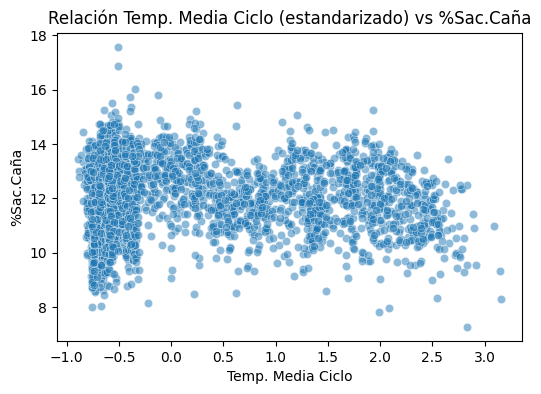

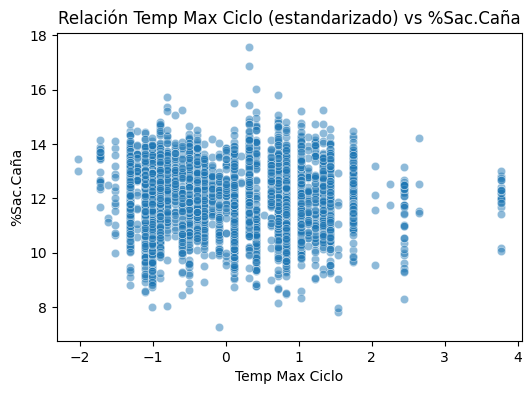

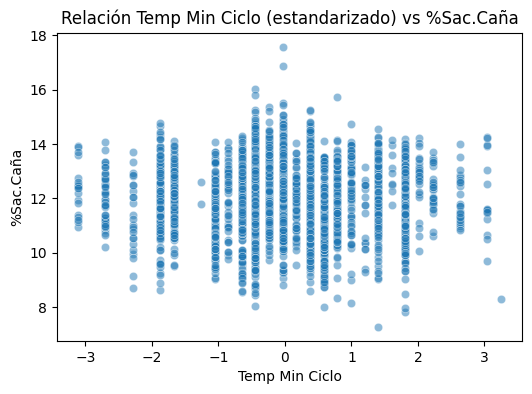

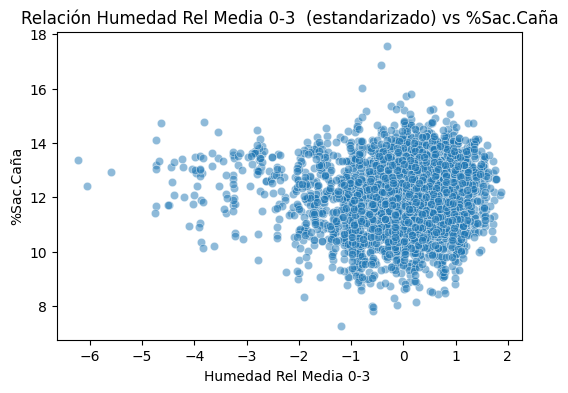

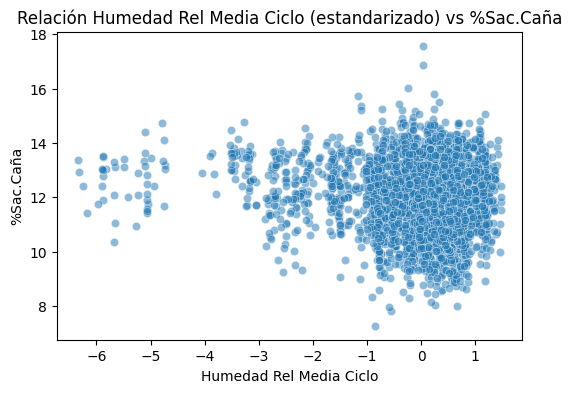

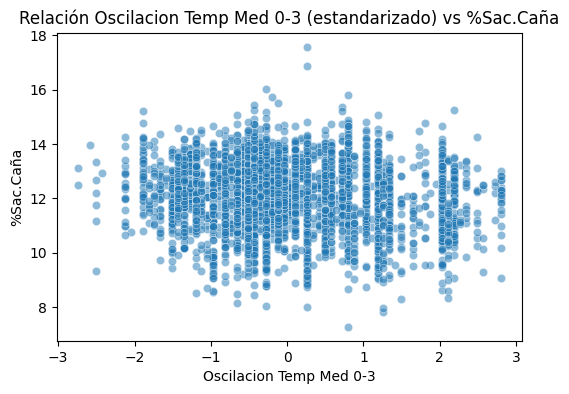

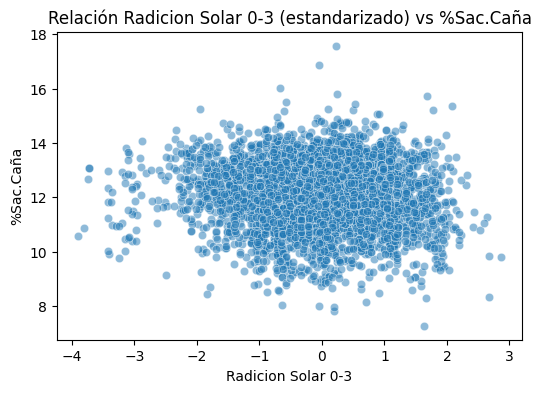

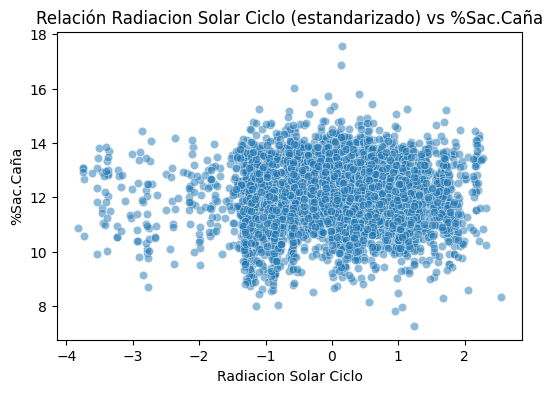

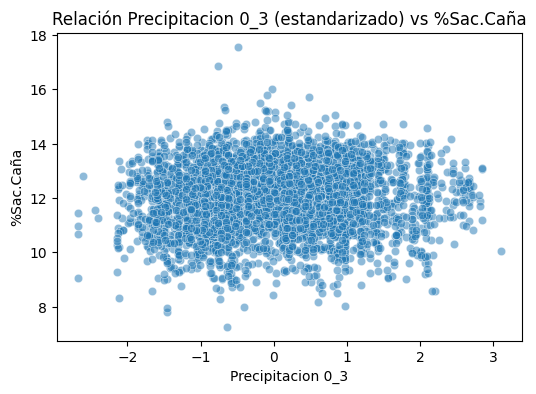

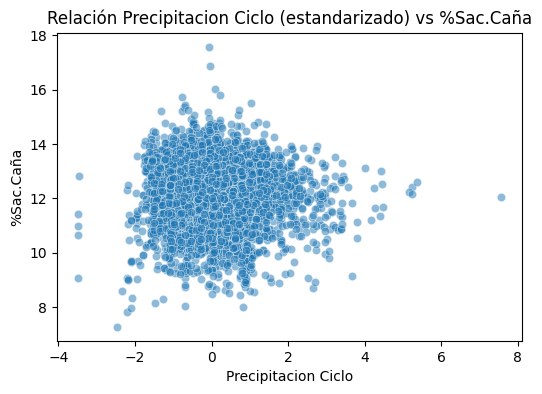

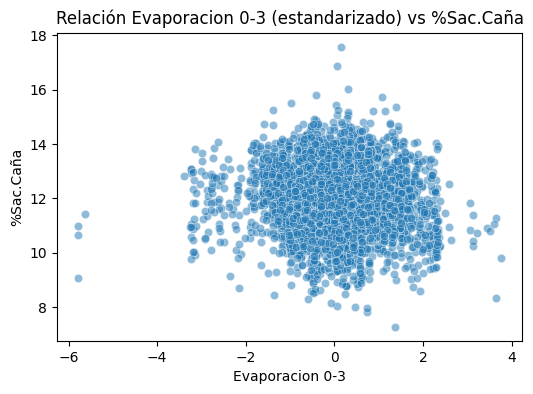

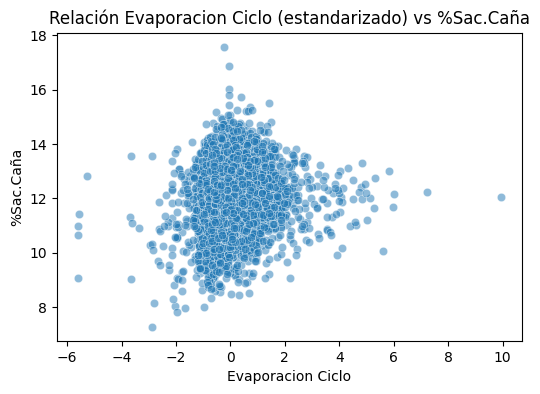

In [19]:
from sklearn.preprocessing import StandardScaler
df_filtered = df.copy()
numericas = df_filtered.select_dtypes(include='number').columns

numericas_sin_tch = [col for col in numericas if col != '%Sac.Caña']

scaler = StandardScaler()
df_scaled = df_filtered.copy()
df_scaled[numericas_sin_tch] = scaler.fit_transform(df_filtered[numericas_sin_tch])

for col in numericas_sin_tch:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_scaled[col], y=df_scaled['%Sac.Caña'], alpha=0.5)
    plt.title(f"Relación {col} (estandarizado) vs %Sac.Caña")
    plt.show()

---
#### **Imputación de algunos valores nulos**

In [20]:
## Productos químicos, fertilizantes
CHEM_FEATURES = ['Urea 46%', 'NITRAX-S', 'MEZ', 'NITO_XTEND', 'Vinaza', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio']
df[CHEM_FEATURES] = df[CHEM_FEATURES].fillna(0)

In [21]:
## trabajamos solo con los valores no nulos de %Sac.Caña, se elimina porque no es un alto porcentaje de nulos
df_mod = df.dropna(subset=['%Sac.Caña'])

In [22]:
df_mod['%Sac.Caña'].isnull().sum()

np.int64(0)

In [26]:
df_mod.loc[:, '%Infest.Diatrea'] = df_mod['%Infest.Diatrea'].fillna(0)

In [ ]:
null_percent = df_mod[['Dosis Madurante', 'Vejez', 'Evaporacion Ciclo', 'Cod. T.Cultivo', 'Radiacion Solar Ciclo', 'Precipitacion Ciclo', 'Lluvias Ciclo', 'Humedad Rel Media Ciclo', 'Humedad Rel Media 0-3 ', 'Temp. Media 0-3', 'Area Neta', 'M3 Riego',  'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Lluvias seis a nueve', 'Luvias 9 -FC', '%Infest.Diatrea', 'Vinaza', 'Oscilacion Temp Med 0-3', 'Evaporacion 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Fosfato Jugo', 'Destino 1=Semilla']].isnull().mean() * 100
null_percent.sort_values(ascending=False).head(10)

Radiacion Solar Ciclo      78.74915
Evaporacion Ciclo          78.74915
Temp. Media 0-3            78.74915
Humedad Rel Media 0-3      78.74915
Precipitacion Ciclo        78.74915
Humedad Rel Media Ciclo    78.74915
Temp Min Ciclo             78.74915
Evaporacion 0-3            78.74915
Temp. Media Ciclo          78.74915
Temp Max Ciclo             78.74915
dtype: float64

In [29]:
df_mod = df_mod.dropna(subset=['Evaporacion Ciclo'])

In [30]:
df_mod['Evaporacion Ciclo'].isnull().sum()

np.int64(0)

In [32]:
null_percent = df_mod[['Dosis Madurante', 'Vejez', 'Evaporacion Ciclo', 'Cod. T.Cultivo', 'Radiacion Solar Ciclo', 'Precipitacion Ciclo', 'Lluvias Ciclo', 'Humedad Rel Media Ciclo', 'Humedad Rel Media 0-3 ', 'Temp. Media 0-3', 'Area Neta', 'M3 Riego',  'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Lluvias seis a nueve', 'Luvias 9 -FC', '%Infest.Diatrea', 'Vinaza', 'Oscilacion Temp Med 0-3', 'Evaporacion 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Fosfato Jugo', 'Destino 1=Semilla']].isnull().mean() * 100
null_percent.sort_values(ascending=False).head(10)

Fosfato Jugo               5.122342
Vejez                      4.001829
Dosis Madurante            0.182941
Evaporacion Ciclo          0.000000
Radiacion Solar Ciclo      0.000000
Cod. T.Cultivo             0.000000
Lluvias Ciclo              0.000000
Humedad Rel Media Ciclo    0.000000
Humedad Rel Media 0-3      0.000000
Precipitacion Ciclo        0.000000
dtype: float64

#### **Revisión de variables categóricas respecto a target**

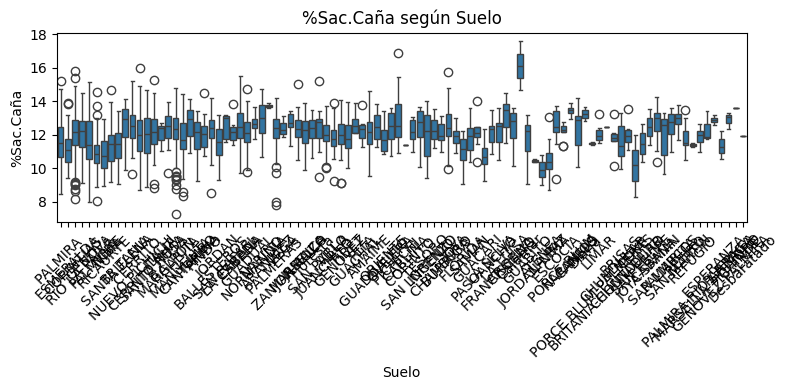

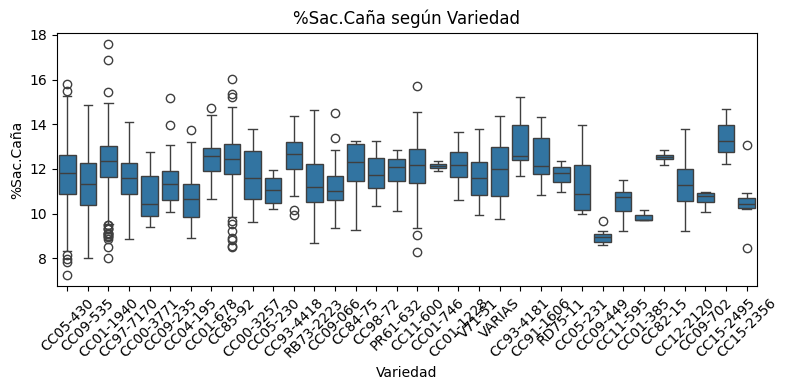

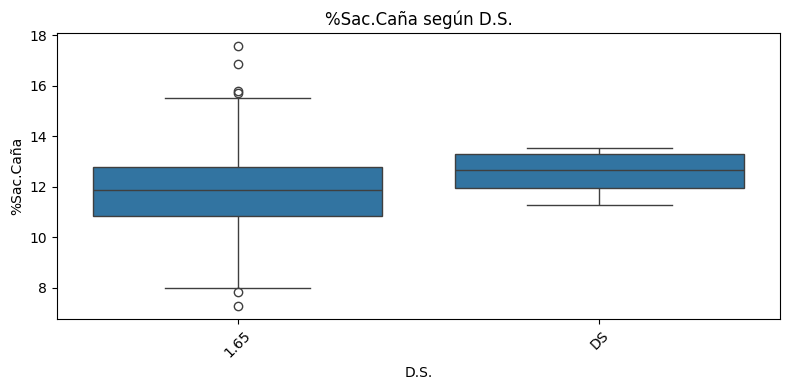

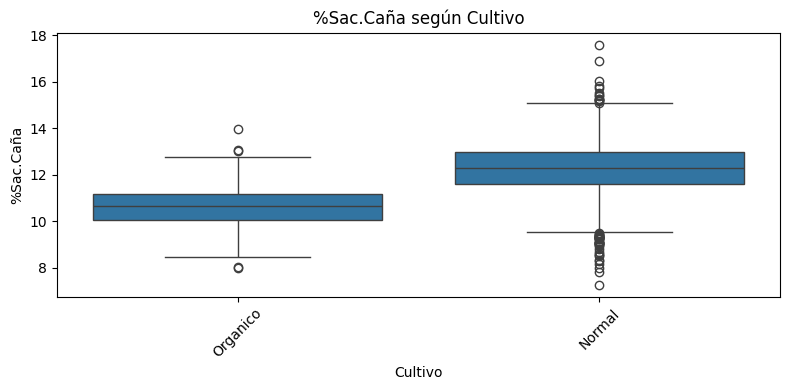

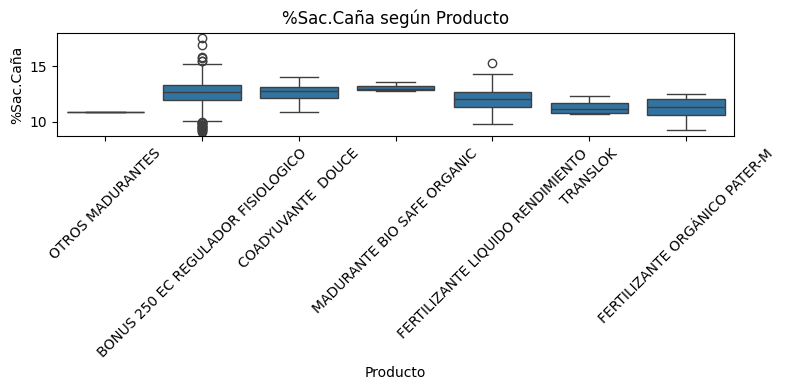

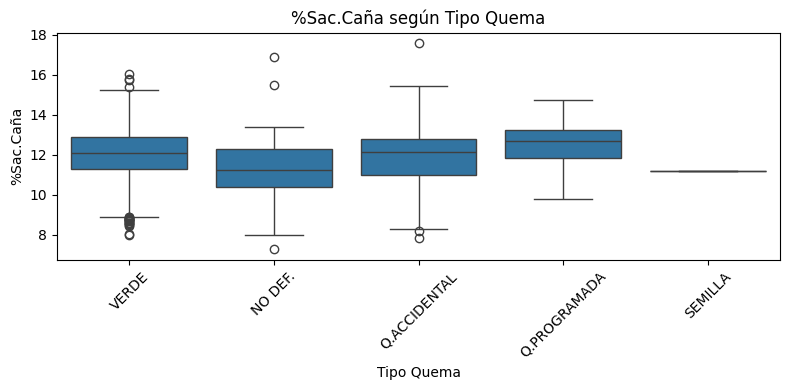

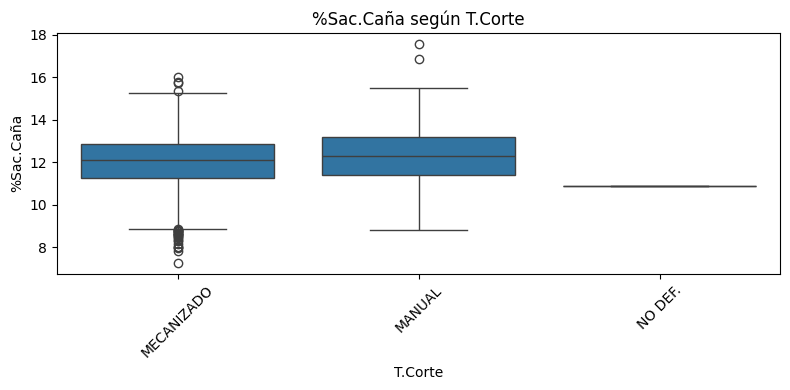

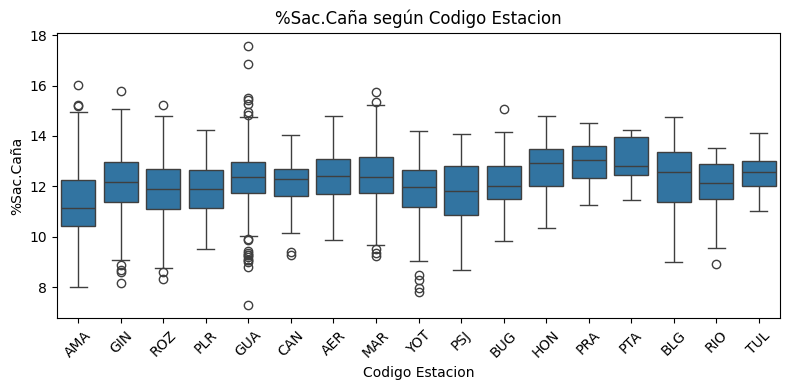

                     F_value        p_value
Cultivo          1267.938655  4.496071e-244
Producto         1168.216360  4.001717e-227
D.S.              142.098939   2.911535e-32
Variedad           27.075584   2.046182e-07
Suelo              23.561514   1.252029e-06
Tipo Quema          7.392599   6.575143e-03
T.Corte             6.567582   1.041850e-02
Codigo Estacion     1.716251   1.902452e-01


In [35]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.preprocessing import LabelEncoder

cat_features = df_mod.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_mod[col], y=df_mod['%Sac.Caña'])
    plt.title(f"%Sac.Caña según {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


anova_results = {}
for col in cat_features:
    le = LabelEncoder()
    x = le.fit_transform(df_mod[col].astype(str))
    f_val, p_val = f_regression(x.reshape(-1, 1), df_mod['%Sac.Caña'])
    anova_results[col] = (f_val[0], p_val[0])

anova_df = pd.DataFrame(anova_results, index=['F_value', 'p_value']).T
print(anova_df.sort_values('F_value', ascending=False))

In [ ]:
## Variedad desbalanceada
df_mod['Variedad'].value_counts()

Variedad
CC01-1940    1981
CC05-430     1035
CC85-92       407
CC09-535      114
RB73-2223     100
CC09-066       94
CC93-4418      76
CC04-195       73
CC97-7170      70
CC11-600       68
VARIAS         50
CC01-1228      46
CC98-72        36
V71-51         34
CC01-678       30
CC00-3257      27
PR61-632       20
CC12-2120      14
CC93-4181      13
CC09-235       13
CC84-75        10
CC09-449        8
CC15-2356       7
CC00-3771       6
CC05-230        6
CC91-1606       6
CC11-595        5
CC09-702        4
RD75-11         4
CC05-231        4
CC82-15         4
CC01-385        3
CC15-2495       3
CC01-746        2
Name: count, dtype: int64

In [37]:
def reagrupar_por_frecuencia(df, umbral=50, categoria='Variedad'):
    df_copy = df.copy()
    
    counts = df_copy[categoria].value_counts()
    variedades_frecuentes = counts[counts >= umbral].index.tolist()
    nuevaCol = categoria + '_Reagrupada'
    df_copy[nuevaCol] = df_copy[categoria].apply(
        lambda x: x if x in variedades_frecuentes else 'OTRAS'
    )
    
    return df_copy

df_mod = reagrupar_por_frecuencia(df_mod, umbral=400, categoria="Variedad")
print(df_mod['Variedad_Reagrupada'].value_counts())

Variedad_Reagrupada
CC01-1940    1981
CC05-430     1035
OTRAS         950
CC85-92       407
Name: count, dtype: int64


In [ ]:
## Suelo desbalanceada
df_mod['Suelo'].value_counts()

Suelo
CORINTIAS             1018
GALPON                 543
PALMIRA                430
MANUELITA              167
NUEVO PICHICHI         125
                      ... 
JOYA-SAMAN               2
CARLINA                  1
BRITANIA-CHUNDULAR       1
PICHINDE                 1
Desbaratado              1
Name: count, Length: 96, dtype: int64

In [40]:
df_mod['Suelo'] = df_mod['Suelo'].fillna(df_mod['Suelo'].mode()[0])

In [41]:
df_mod = reagrupar_por_frecuencia(df_mod, umbral=80, categoria="Suelo")
print(df_mod['Suelo_Reagrupada'].value_counts())

Suelo_Reagrupada
OTRAS             1423
CORINTIAS         1219
GALPON             543
PALMIRA            430
MANUELITA          167
NUEVO PICHICHI     125
PALMERAS           100
GENOVA              97
CERRITO             92
SANTA ROSA          90
PALMICHE            87
Name: count, dtype: int64


--- 
#### **Evaluación y preprocesamiento General**

In [42]:
from sklearn.model_selection import train_test_split

X = df_mod[['Dosis Madurante', 'Vejez', 'Evaporacion Ciclo', 'Cod. T.Cultivo', 'Radiacion Solar Ciclo', 'Precipitacion Ciclo', 'Lluvias Ciclo', 'Humedad Rel Media Ciclo', 'Humedad Rel Media 0-3 ', 'Temp. Media 0-3', 'Area Neta', 'M3 Riego',  'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Lluvias seis a nueve', 'Luvias 9 -FC', '%Infest.Diatrea', 'Vinaza', 'Oscilacion Temp Med 0-3', 'Evaporacion 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Fosfato Jugo', 'Variedad_Reagrupada', 'Destino 1=Semilla']]
y = df_mod['%Sac.Caña']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)


#### **Regresión Lineal**

In [52]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

cv_scores_lr_mse = -cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

cv_scores_lr_r2 = cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='r2'
)

cv_scores_lr_rmse = np.sqrt(cv_scores_lr_mse)
print("\n--- Regresión Lineal Múltiple (Validación Cruzada) ---")
print(f"MSE promedio: {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"RMSE promedio: {np.mean(cv_scores_lr_rmse):.4f} (+/- {np.std(cv_scores_lr_rmse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")

# --- Ridge y Lasso con GridSearch ---
param_grid = {'alpha': np.logspace(-4, 2, 100)}  

grid_search_ridge = GridSearchCV(
    Ridge(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_ridge.fit(X_train_prep, y_train)

grid_search_lasso = GridSearchCV(
    Lasso(max_iter=5000),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_lasso.fit(X_train_prep, y_train)

# --- Ridge ---
ridge_best = grid_search_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_prep)

ridge_mse_test = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse_test = np.sqrt(ridge_mse_test)
ridge_r2_test = r2_score(y_test, y_pred_ridge)

print("\n--- Ridge (L2) ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_ridge.best_score_):.4f}")
print(f"Train R²: {ridge_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {ridge_mse_test:.4f}")
print(f"Test RMSE: {ridge_rmse_test:.4f}")
print(f"Test R²: {ridge_r2_test:.4f}")

# --- Lasso ---
lasso_best = grid_search_lasso.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_prep)

lasso_mse_test = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse_test = np.sqrt(lasso_mse_test)
lasso_r2_test = r2_score(y_test, y_pred_lasso)

print("\n--- Lasso (L1) ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_lasso.best_score_):.4f}")
print(f"Train R²: {lasso_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {lasso_mse_test:.4f}")
print(f"Test RMSE: {lasso_rmse_test:.4f}")
print(f"Test R²: {lasso_r2_test:.4f}")



--- Regresión Lineal Múltiple (Validación Cruzada) ---
MSE promedio: 0.8181 (+/- 0.0384)
RMSE promedio: 0.9042 (+/- 0.0212)
R^2 promedio: 0.4029 (+/- 0.0268)

--- Ridge (L2) ---
Mejor alpha: 100.0000
Mejor MSE (CV): 0.8315
Mejor RMSE (CV): 0.9119
Train R²: 0.4155
Test MSE: 0.8330
Test RMSE: 0.9127
Test R²: 0.4322

--- Lasso (L1) ---
Mejor alpha: 0.0066
Mejor MSE (CV): 0.8248
Mejor RMSE (CV): 0.9082
Train R²: 0.4135
Test MSE: 0.8316
Test RMSE: 0.9119
Test R²: 0.4332


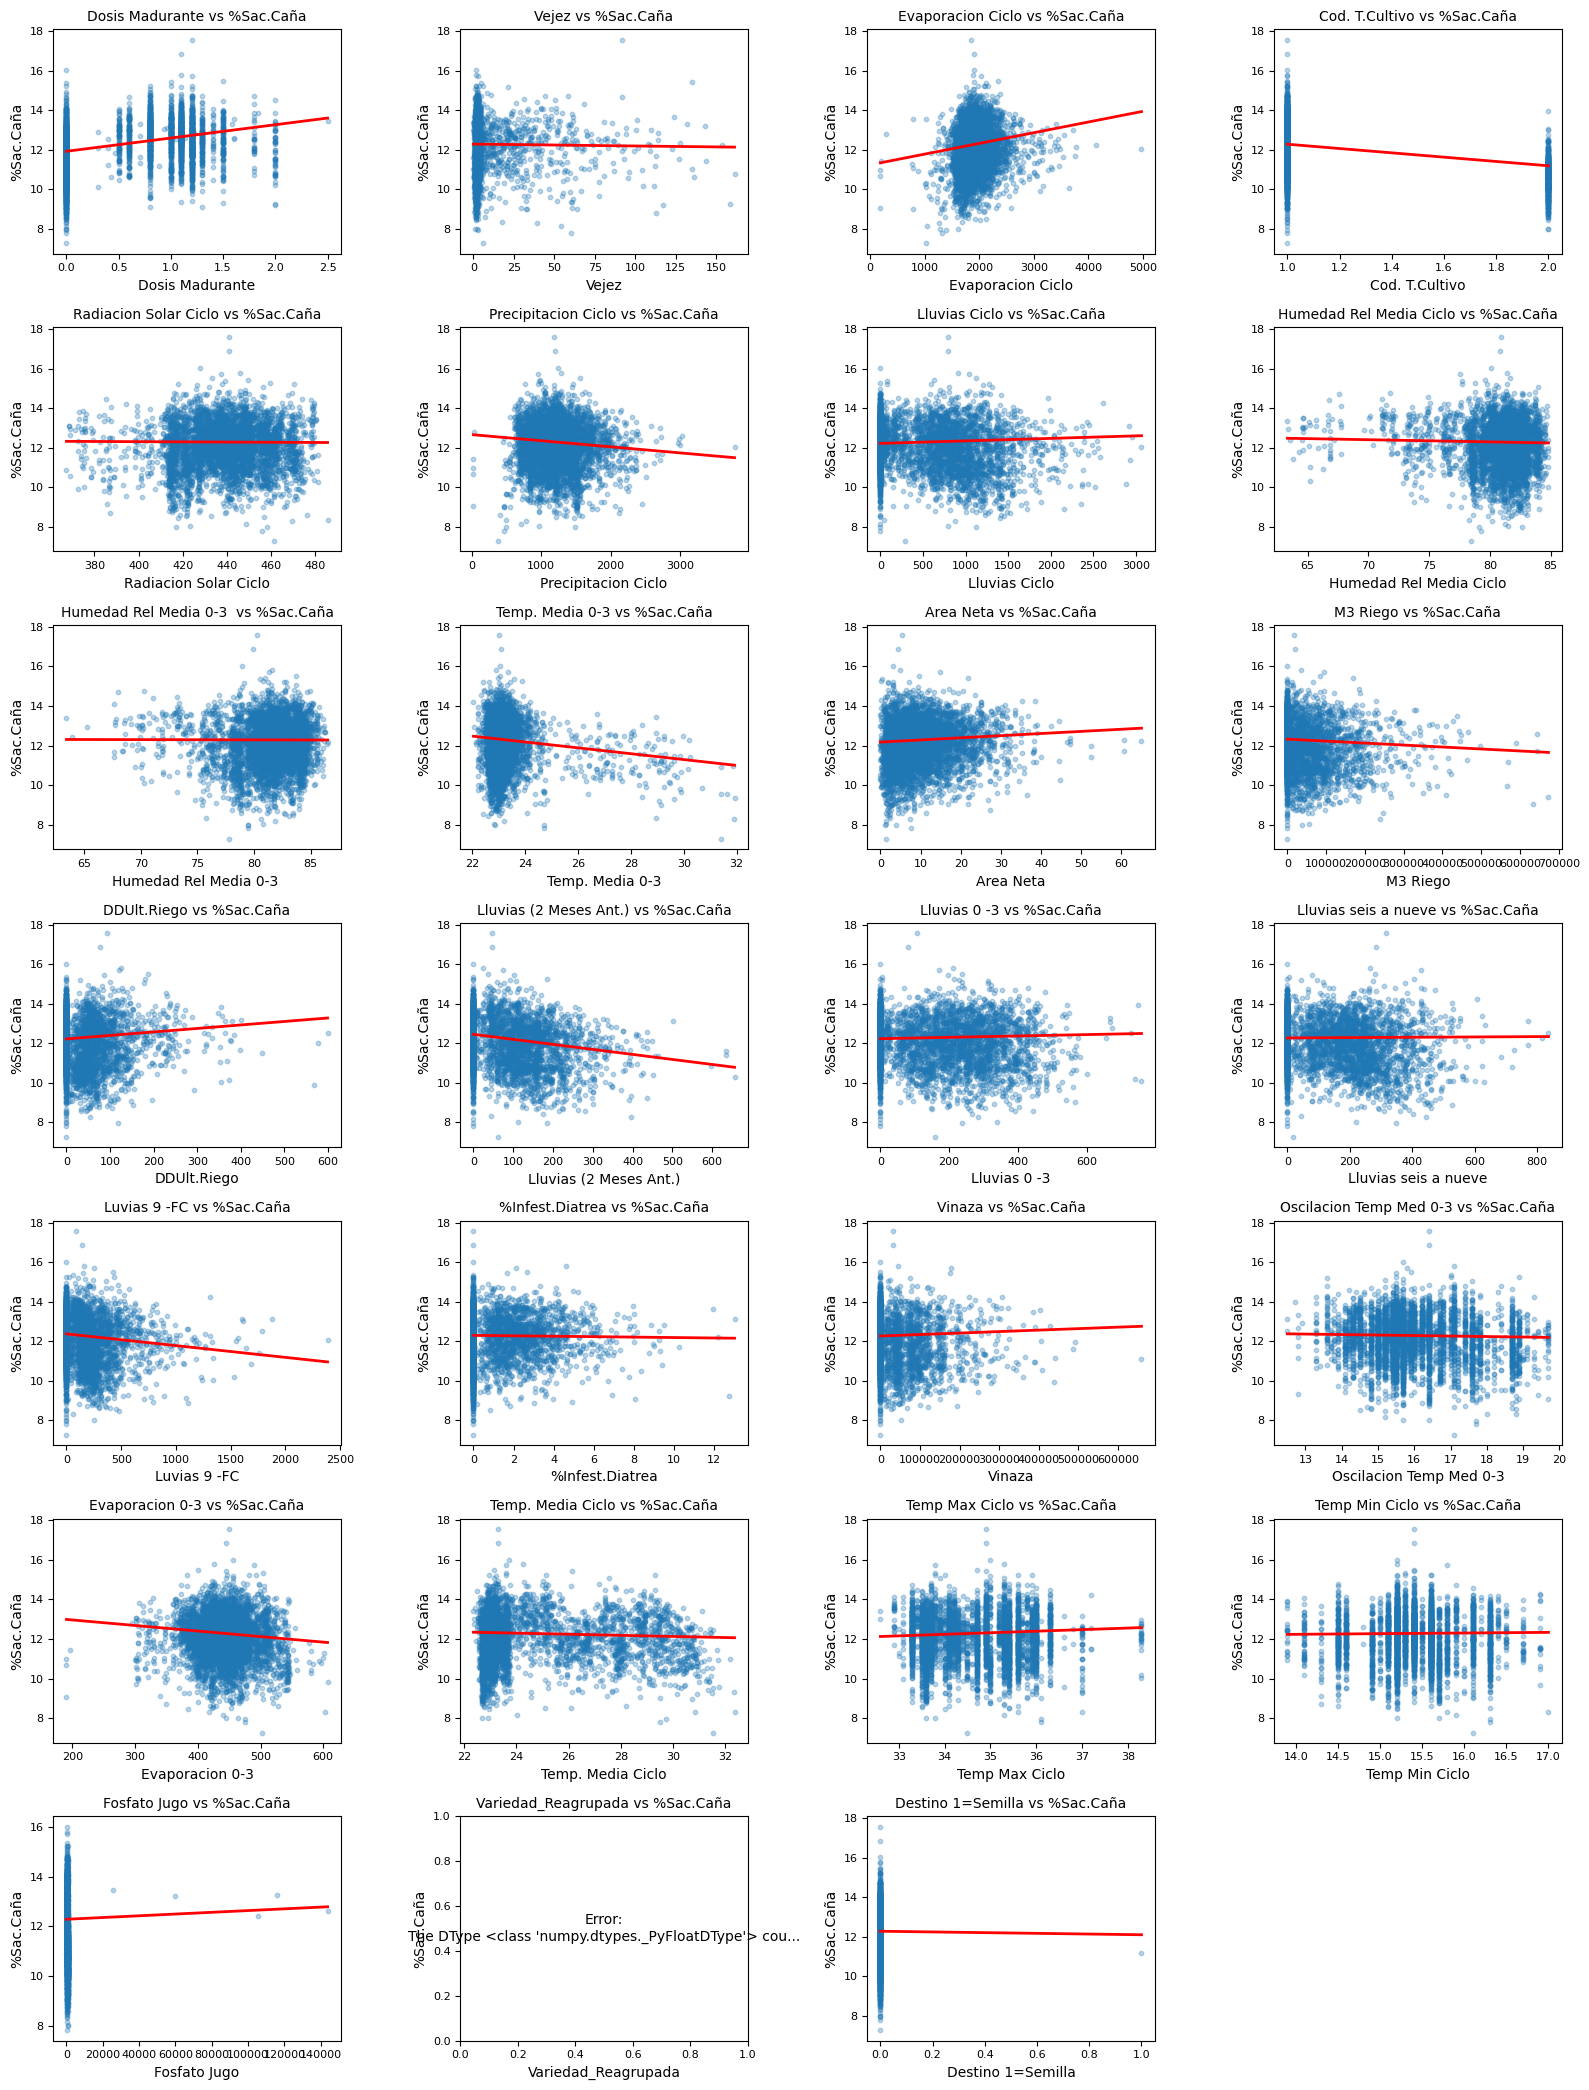

In [53]:
def plot_all_variables_vs_target(X_train, y_train, df_mod, target_col, model, preprocessor, 
                                figsize_per_plot=(4, 3)):
    
    variables = X_train.columns
    n_vars = len(variables)
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, 
                            figsize=(figsize_per_plot[0] * n_cols, 
                                   figsize_per_plot[1] * n_rows))
    
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    axes_flat = axes.flatten()

    base_values = {}
    for col in X_train.columns:
        if X_train[col].dtype in ['object', 'string'] or X_train[col].nunique() < 10:
            base_values[col] = X_train[col].mode()[0]
        else:
            base_values[col] = X_train[col].mean()
    
    for i, var in enumerate(variables):
        ax = axes_flat[i]
        
        try:
            X_range = np.linspace(df_mod[var].min(), df_mod[var].max(), 100)
            
            X_plot = pd.DataFrame([base_values] * 100)
            X_plot[var] = X_range
            
            X_plot_prep = preprocessor.transform(X_plot)
            y_pred = model.predict(X_plot_prep)
            
            ax.scatter(df_mod[var], df_mod[target_col], alpha=0.3, s=10)
            ax.plot(X_range, y_pred, color="red", linewidth=2)
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error:\n{str(e)[:50]}...', 
                   transform=ax.transAxes, ha='center', va='center')
        
        ax.set_xlabel(var)
        ax.set_ylabel(target_col)
        ax.set_title(f'{var} vs {target_col}', fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=8)

    for i in range(n_vars, len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_all_variables_vs_target(
    X_train=X_train,
    y_train=y_train, 
    df_mod=df_mod,
    target_col='%Sac.Caña',
    model=grid_search_ridge.best_estimator_,
    preprocessor=preprocessor
)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()


numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),   
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False, interaction_only=True))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)


cv_scores_lr_mse = -cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

cv_scores_lr_r2 = cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='r2'
)
cv_scores_lr_rmse = np.sqrt(cv_scores_lr_mse)

lr_model = LinearRegression().fit(X_train_prep, y_train)
y_pred_lr = lr_model.predict(X_test_prep)

print("\n--- Regresión Polinómica (Lineal) ---")
print(f"MSE promedio (CV): {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"RMSE promedio (CV): {np.mean(cv_scores_lr_rmse):.4f} (+/- {np.std(cv_scores_lr_rmse):.4f})")
print(f"R^2 promedio (CV): {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")
print(f"Train R²: {lr_model.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_lr):.4f}")

param_grid = {'alpha': np.logspace(-4, 2, 100)}  

grid_search_ridge = GridSearchCV(
    Ridge(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_ridge.fit(X_train_prep, y_train)

ridge_best = grid_search_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_prep)

print("\n--- Ridge (L2) ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_ridge.best_score_):.4f}")
print(f"Train R²: {ridge_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_ridge):.4f}")

grid_search_lasso = GridSearchCV(
    Lasso(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_lasso.fit(X_train_prep, y_train)

lasso_best = grid_search_lasso.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_prep)

print("\n--- Lasso (L1) ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_lasso.best_score_):.4f}")
print(f"Train R²: {lasso_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_lasso):.4f}")

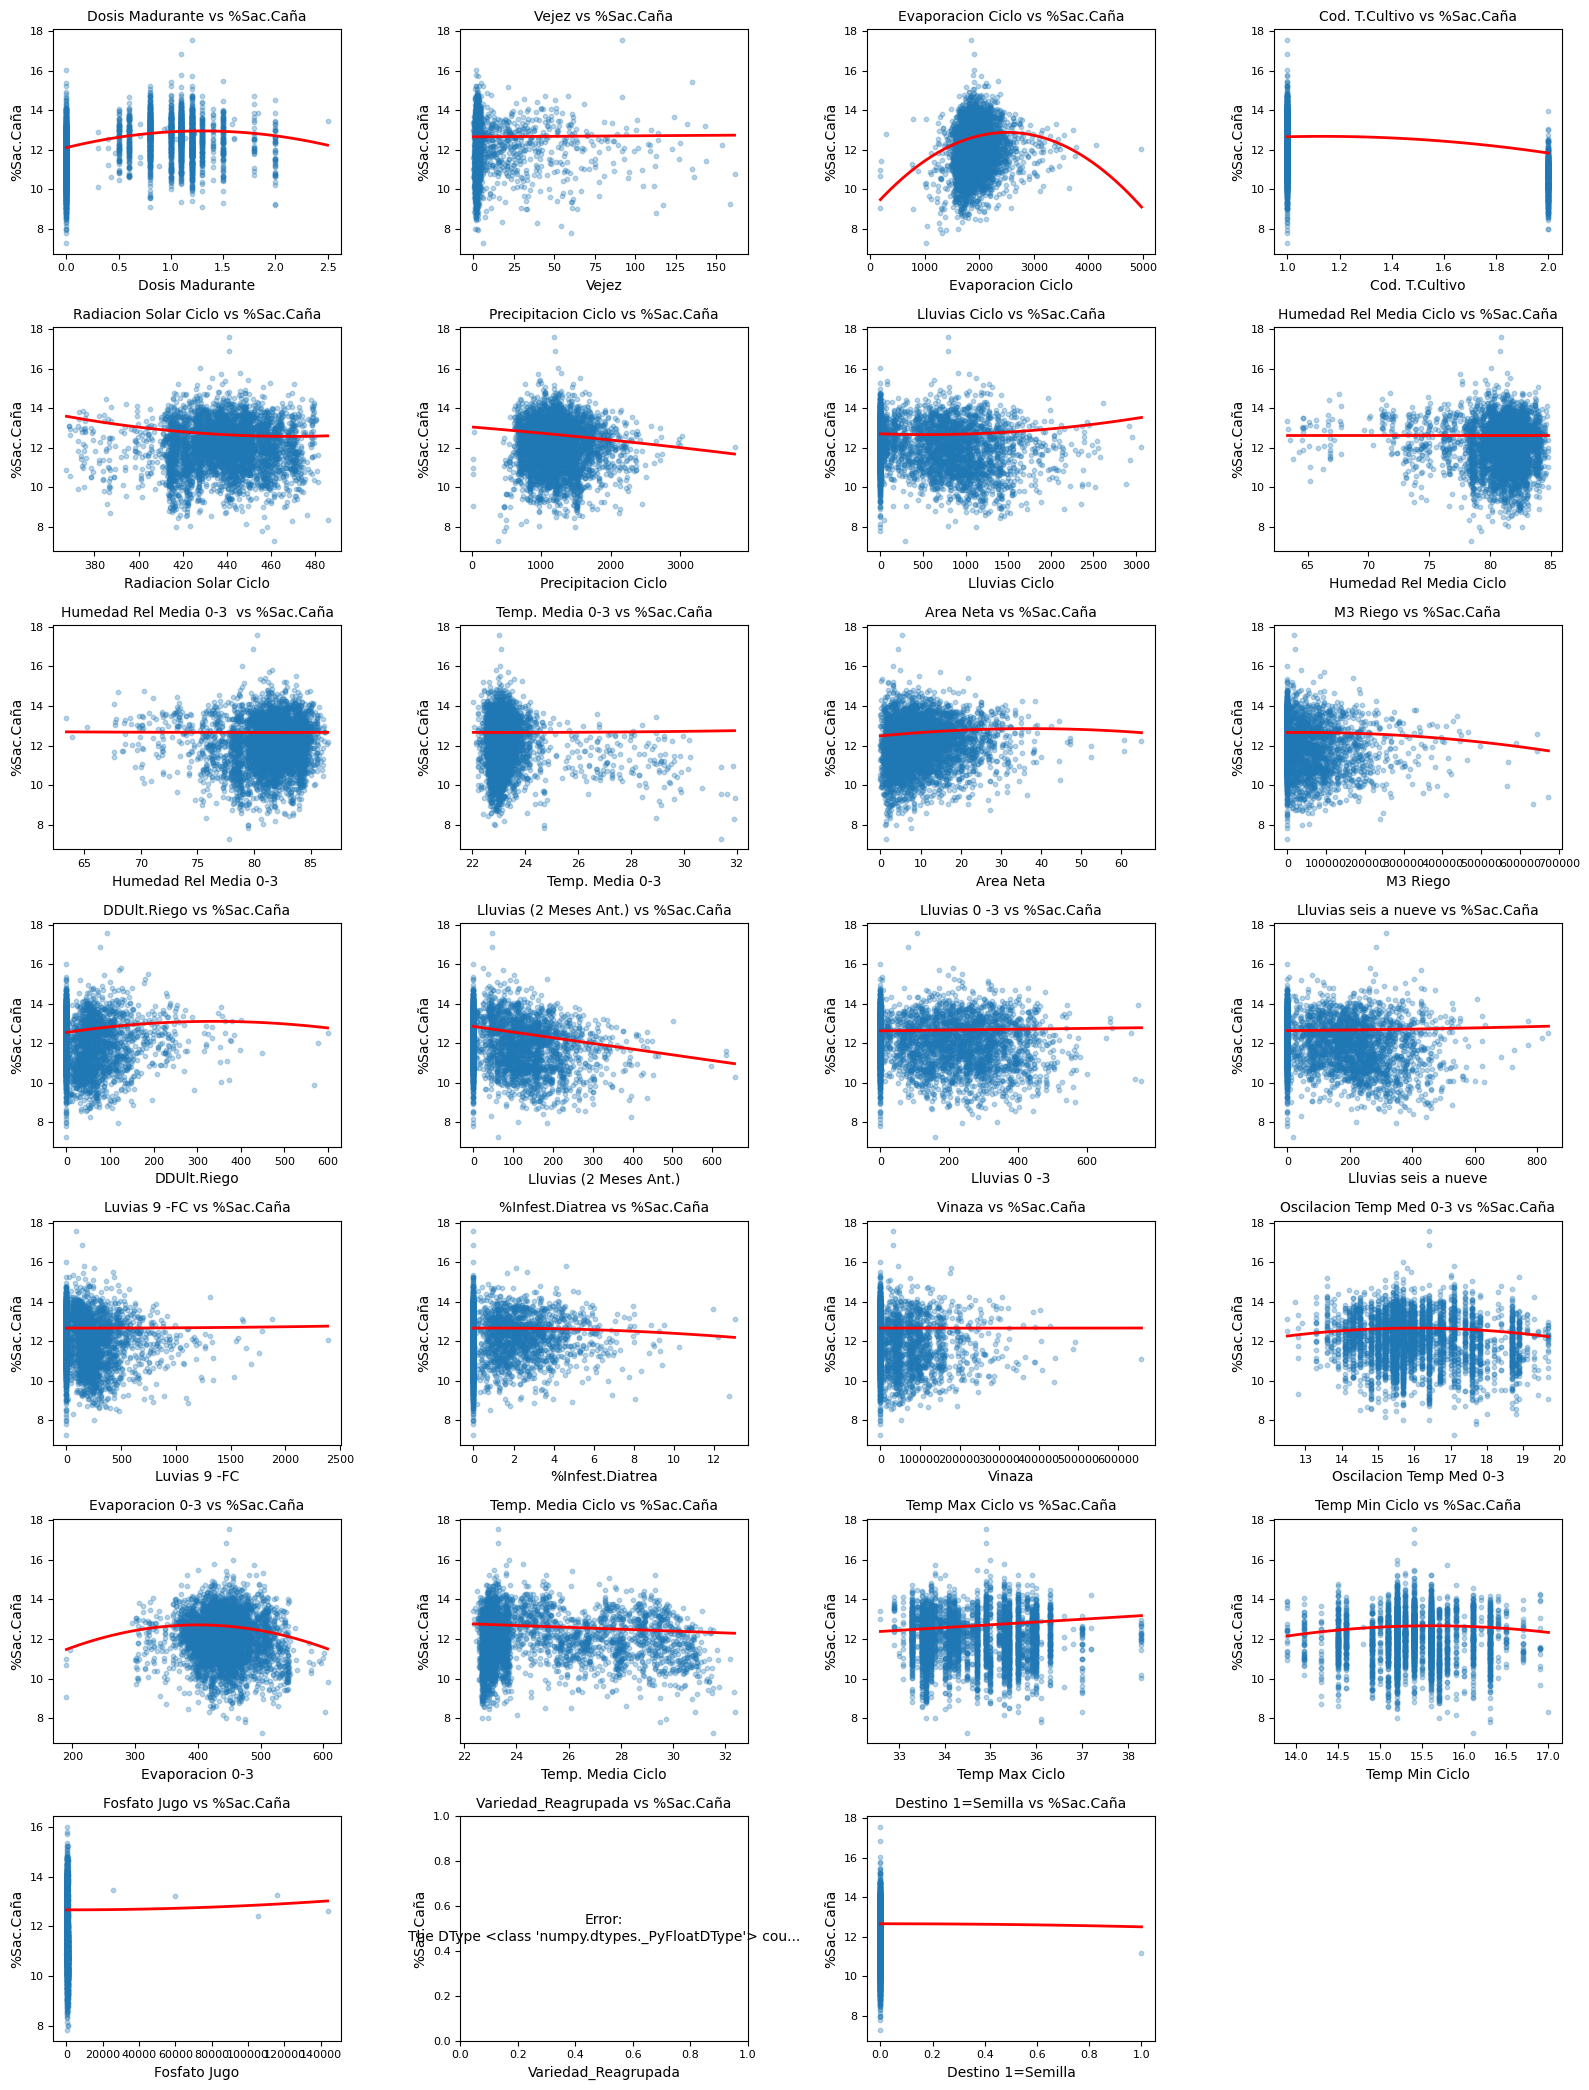

In [50]:
def plot_all_variables_vs_target(X_train, y_train, df_mod, target_col, model, preprocessor, 
                                figsize_per_plot=(4, 3)):
    
    variables = X_train.columns
    n_vars = len(variables)
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, 
                            figsize=(figsize_per_plot[0] * n_cols, 
                                   figsize_per_plot[1] * n_rows))
    
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    axes_flat = axes.flatten()

    base_values = {}
    for col in X_train.columns:
        if X_train[col].dtype in ['object', 'string'] or X_train[col].nunique() < 10:
            base_values[col] = X_train[col].mode()[0]
        else:
            base_values[col] = X_train[col].mean()
    
    for i, var in enumerate(variables):
        ax = axes_flat[i]
        
        try:
            X_range = np.linspace(df_mod[var].min(), df_mod[var].max(), 100)
            
            X_plot = pd.DataFrame([base_values] * 100)
            X_plot[var] = X_range
            
            X_plot_prep = preprocessor.transform(X_plot)
            y_pred = model.predict(X_plot_prep)
            
            ax.scatter(df_mod[var], df_mod[target_col], alpha=0.3, s=10)
            ax.plot(X_range, y_pred, color="red", linewidth=2)
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error:\n{str(e)[:50]}...', 
                   transform=ax.transAxes, ha='center', va='center')
        
        ax.set_xlabel(var)
        ax.set_ylabel(target_col)
        ax.set_title(f'{var} vs {target_col}', fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=8)

    for i in range(n_vars, len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_all_variables_vs_target(
    X_train=X_train,
    y_train=y_train, 
    df_mod=df_mod,
    target_col='%Sac.Caña',
    model=grid_search_lasso.best_estimator_,
    preprocessor=preprocessor
)

In [ ]:

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()


numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),   
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False))  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)


cv_scores_lr_mse = -cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

cv_scores_lr_r2 = cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='r2'
)
cv_scores_lr_rmse = np.sqrt(cv_scores_lr_mse)

lr_model = LinearRegression().fit(X_train_prep, y_train)
y_pred_lr = lr_model.predict(X_test_prep)

print("\n--- Regresión Polinómica (Lineal) ---")
print(f"MSE promedio (CV): {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"RMSE promedio (CV): {np.mean(cv_scores_lr_rmse):.4f} (+/- {np.std(cv_scores_lr_rmse):.4f})")
print(f"R^2 promedio (CV): {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")
print(f"Train R²: {lr_model.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_lr):.4f}")

param_grid = {'alpha': np.logspace(-4, 2, 50)}  

grid_search_ridge = GridSearchCV(
    Ridge(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_ridge.fit(X_train_prep, y_train)

ridge_best = grid_search_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_prep)

print("\n--- Ridge (L2) ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_ridge.best_score_):.4f}")
print(f"Train R²: {ridge_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_ridge):.4f}")

grid_search_lasso = GridSearchCV(
    Lasso(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_lasso.fit(X_train_prep, y_train)

lasso_best = grid_search_lasso.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_prep)

print("\n--- Lasso (L1) ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_lasso.best_score_):.4f}")
print(f"Train R²: {lasso_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_lasso):.4f}")


--- Elastic Net (L1 + L2) ---
Mejor alpha: 0.0162
Mejor l1_ratio: 0.50
Mejor MSE (CV): 0.7594
Mejor RMSE (CV): 0.8715
Train R²: 0.5103
Test MSE: 0.7190
Test RMSE: 0.8480
Test R²: 0.5099
